# Analyzing Regular Season vs. Playoff Play Types

We can premise this analysis with the [famous statement from Charles Barkley](https://www.youtube.com/watch?v=SpcZNhJfqhQ) about *Jump Shooting Teams*. In short, he said that the 2015-16 Golden State Warriors would not succeed in the playoffs due to their reliance on jump shooting. He argued, as analysts and old-timers often do, that the offense *"bogs down"* in the playoffs and teams that will succeed in the playoffs have the ability to run an offense that slows down.

Even after the 3-point revolution and the Warriors winning multiple titles, analysts are still skeptic of certain offenses. For example in the recent [Real GM Radio Podcast with Danny Leroux and Jared Dubin](https://www.podcastone.com/episode/Jared-Dubin-on-the-Deadline-and-Title-Contenders), they say they're skeptical of Milwaukee's ability to perform in the playoffs, saying their superstar-centered offense reliant on Giannis passing out of double teams to 3-point shooters does not work in the playoffs.

I try to debunk this myth by comparing regular season play types vs. playoff play types for each team in the 2017-18 and 2018-19 years.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

## Data Aggregation

Data was aggregated from [stats.nba.com](https://stats.nba.com/). They have a separate [endpoint](https://stats.nba.com/teams/isolation/) for play types, tracked by Synergy since the year 2015-16.

I aggregate all the statistics from 2015 onwards, but use data only from 2017 onwards due to the massive changes in NBA offenses over the past two years.

After collecting all the data, I saved it to a csv file for future use.

In [2]:
df = pd.read_csv('data.csv')
df.head()

,EFG_PCT,FGA,FGM,FGMX,FG_PCT,FT_POSS_PCT,GP,PERCENTILE,PLAY_TYPE,PLUSONE_POSS_PCT,...,SCORE_POSS_PCT,SEASON_ID,SF_POSS_PCT,SeasonType,TEAM_ABBREVIATION,TEAM_ID,TEAM_NAME,TOV_POSS_PCT,TYPE_GROUPING,Season
0,0.604,16.0,8.5,7.5,0.532,0.149,82.0,0.483,Transition,0.028,...,0.511,22015,0.134,Regular Season,HOU,1.610613e+09,Houston Rockets,0.121,Offensive,2015-2016
1,0.622,15.4,8.7,6.7,0.565,0.127,82.0,0.345,Transition,0.023,...,0.512,22015,0.108,Regular Season,SAC,1.610613e+09,Sacramento Kings,0.158,Offensive,2015-2016
2,0.586,15.6,8.3,7.3,0.530,0.166,82.0,0.414,Transition,0.033,...,0.523,22015,0.146,Regular Season,WAS,1.610613e+09,Washington Wizards,0.108,Offensive,2015-2016
3,0.658,15.0,8.6,6.4,0.576,0.107,82.0,0.931,Transition,0.019,...,0.524,22015,0.095,Regular Season,GSW,1.610613e+09,Golden State Warriors,0.142,Offensive,2015-2016
4,0.612,13.1,7.4,5.8,0.560,0.175,82.0,0.655,Transition,0.041,...,0.534,22015,0.149,Regular Season,OKC,1.610613e+09,Oklahoma City Thunder,0.135,Offensive,2015-2016


Let's define some constant colors.

In [3]:
COLORS = {'ATL': {'main_color': 'red', 'secondary_color': 'white'},
 'BKN': {'main_color': 'black', 'secondary_color': 'white'},
 'BOS': {'main_color': 'green', 'secondary_color': 'white'},
 'CHA': {'main_color': 'purple', 'secondary_color': 'teal'},
 'CHI': {'main_color': 'red', 'secondary_color': 'black'},
 'CLE': {'main_color': '#722F37', 'secondary_color': 'gold'},
 'DAL': {'main_color': 'blue', 'secondary_color': 'silver'},
 'DEN': {'main_color': 'blue', 'secondary_color': 'gold'},
 'DET': {'main_color': 'blue', 'secondary_color': 'red'},
 'GSW': {'main_color': 'gold', 'secondary_color': 'blue'},
 'HOU': {'main_color': 'red', 'secondary_color': 'silver'},
 'IND': {'main_color': 'blue', 'secondary_color': 'gold'},
 'LAC': {'main_color': 'red', 'secondary_color': 'blue'},
 'LAL': {'main_color': 'purple', 'secondary_color': 'gold'},
 'MEM': {'main_color': 'midnightBlue', 'secondary_color': 'bealeStreetBlue'},
 'MIA': {'main_color': 'red', 'secondary_color': 'black'},
 'MIL': {'main_color': 'green', 'secondary_color': 'cream'},
 'MIN': {'main_color': 'blue', 'secondary_color': 'green'},
 'NOP': {'main_color': 'blue', 'secondary_color': 'red'},
 'NYK': {'main_color': 'blue', 'secondary_color': 'orange'},
 'OKC': {'main_color': 'blue', 'secondary_color': 'orange'},
 'ORL': {'main_color': 'blue', 'secondary_color': 'silver'},
 'PHI': {'main_color': 'blue', 'secondary_color': 'red'},
 'PHX': {'main_color': 'orange', 'secondary_color': 'purple'},
 'POR': {'main_color': 'red', 'secondary_color': 'black'},
 'SAC': {'main_color': 'purple', 'secondary_color': 'silver'},
 'SAS': {'main_color': 'silver', 'secondary_color': 'black'},
 'TOR': {'main_color': 'red', 'secondary_color': 'silver'},
 'UTA': {'main_color': 'navy', 'secondary_color': 'yellow'},
 'WAS': {'main_color': 'navy', 'secondary_color': 'red'}}

## Plotting Difference in Playoff and Regular Season Possession Percentages

Here, we create 2 dataframes (`reg_season_df` and `playoffs_df`) for a certain team and season.

Next, we create a new dataframe `diff_df` that contains the `POSS_PCT` values for the regular season and playoffs. We also add another column called `Difference` that computes the difference between the two (playoffs - regular season).

Finally, we plot this difference as a bar plot.

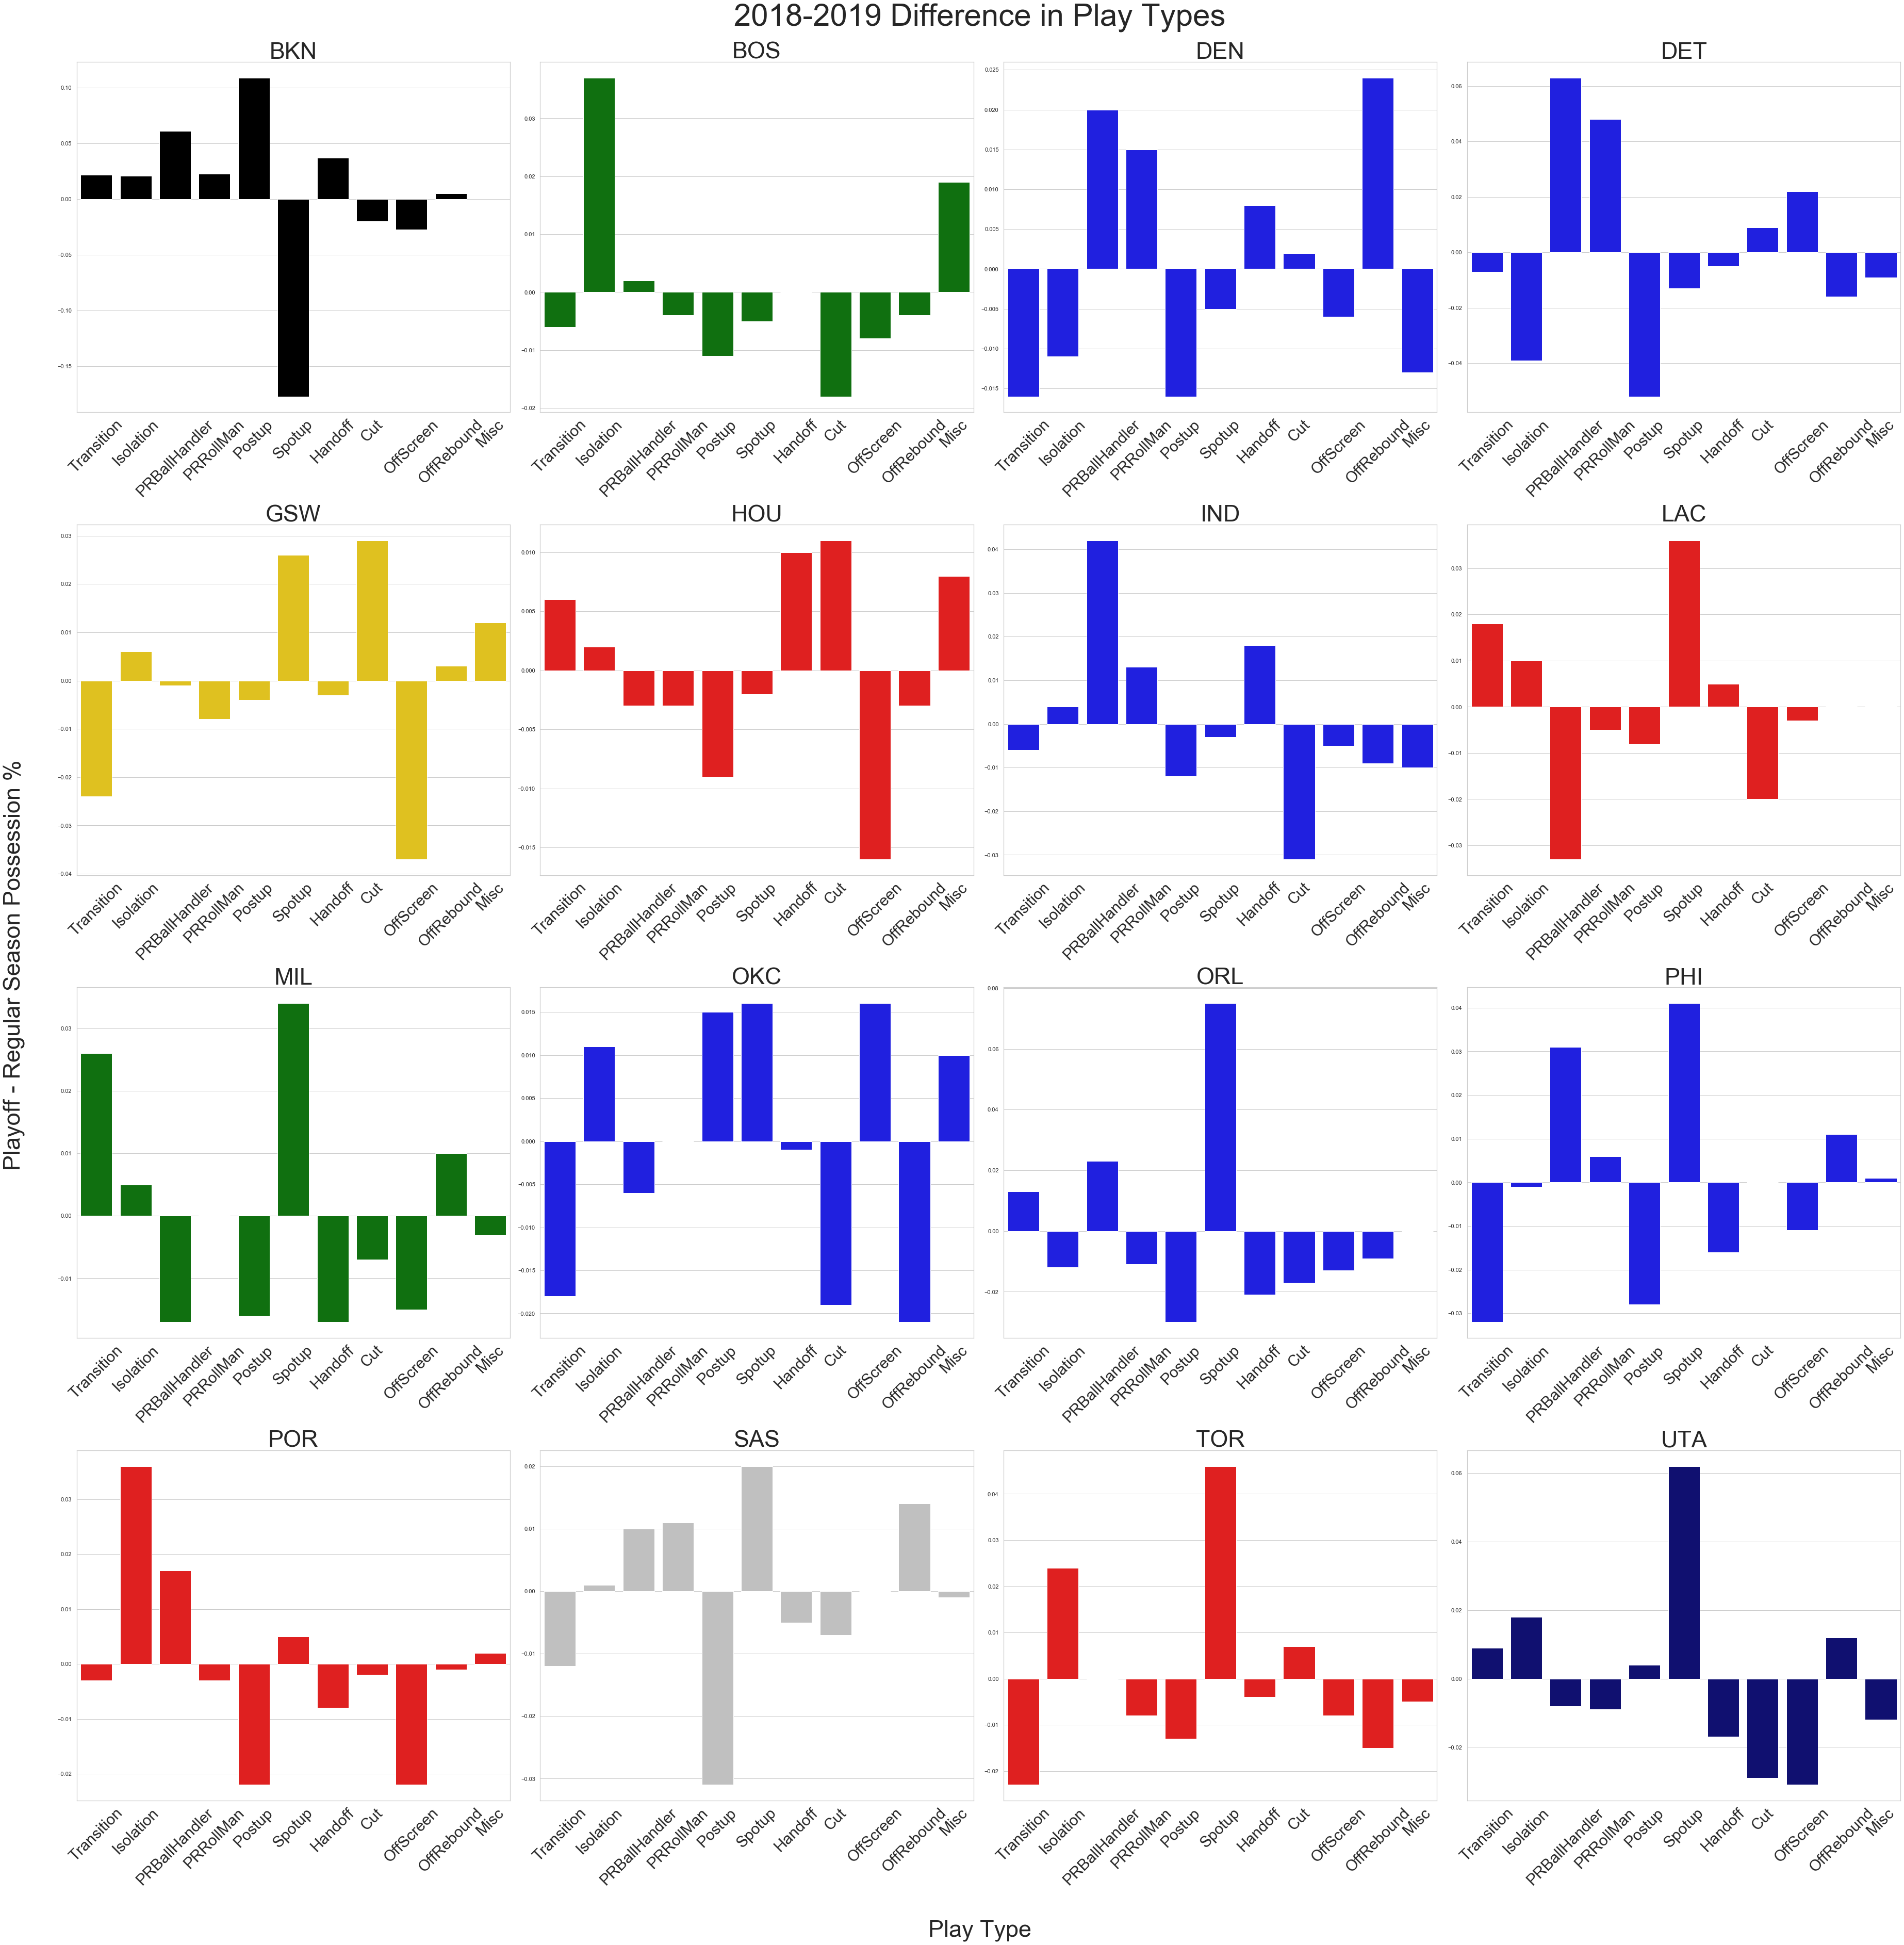

In [4]:
def plot_team_differences(season='2018-2019'):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(50, 50))
    r = 0
    c = 0
    i = 0
    play_types = df['PLAY_TYPE'].unique()
    for team_abbr in sorted(list(set(df['TEAM_ABBREVIATION'].values))):
        if c==4:
            r+=1
            c=0
        reg_season_df = df[(df['TEAM_ABBREVIATION']==team_abbr) & (df['Season']==season) 
                           & (df['SeasonType']=='Regular Season')]
        playoffs_df = df[(df['TEAM_ABBREVIATION']==team_abbr) & (df['Season']==season) 
                           & (df['SeasonType']=='Playoffs')]
        reg_season_df.reset_index(inplace=True)
        playoffs_df.reset_index(inplace=True)
        if len(playoffs_df)==0: continue
        ax = axes[r][c]
        diff_df = pd.DataFrame()
        diff_df['Play Type'] = play_types
        diff_df['Season Poss %'] = reg_season_df['POSS_PCT']
        diff_df['Playoff Poss %'] = playoffs_df['POSS_PCT']
        diff_df['Difference'] = diff_df['Playoff Poss %'] - diff_df['Season Poss %']
        colors = [COLORS[team_abbr]['main_color']]*len(playoffs_df)
        sns.barplot(x='Play Type', y='Difference', data=diff_df, palette=colors, ax=ax)
        ax.set_title(f'{team_abbr}', fontsize=45)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, fontsize=30)
        c+=1
    fig.text(0.5, -0.02, 'Play Type', ha='center', va='center', fontsize=45)
    fig.text(-0.02, 0.5, 'Playoff - Regular Season Possession %', ha='center', va='center', rotation='vertical', fontsize=45)
    fig.text(0.5, 1.01, f'{season} Difference in Play Types', ha='center', va='center', fontsize=60)
    fig.tight_layout()
    ax.figure.savefig(f'{season}_play_type_diff.png', bbox_inches='tight', pad_inches=0)
plot_team_differences()

### General Observations on Each Play Type

#### Transition
Seems to decrease for most teams except Milwaukee

#### Isolation
Kind of all over the place except for Portland - probably due to Damian Lillard in Dame Time.

#### Pick and Roll Ball Handler
Seems to increase, overall. This pattern makes sense with the *isolation increases* premise since there is less passing. 

#### Pick and Roll Roll Man
As as result of the above pattern, this does and should decrease.

#### Postup
Seems to decrease **significantly**. This pattern would go against the classic premise of "oh, we have to dump the ball to the big man". Note that this even happens for teams with skilled big men (e.g. the 76'ers with Joel Embiid).

#### Spotup
Spotup increases as a general pattern.

#### Handoff and Cuts
Both of these seem to decrease. This pattern agrees with the premise that teams run *less* plays in the playoffs and allow the game to flow.

#### Offscreen
Seems to generally decrease, not signficantly.

#### Offensive Rebound
No significant pattern.

## Team Differences in Overall Offense

Which teams change their offenses the most? 

Let's create the same `diff_df` and total the magnitude of each difference.

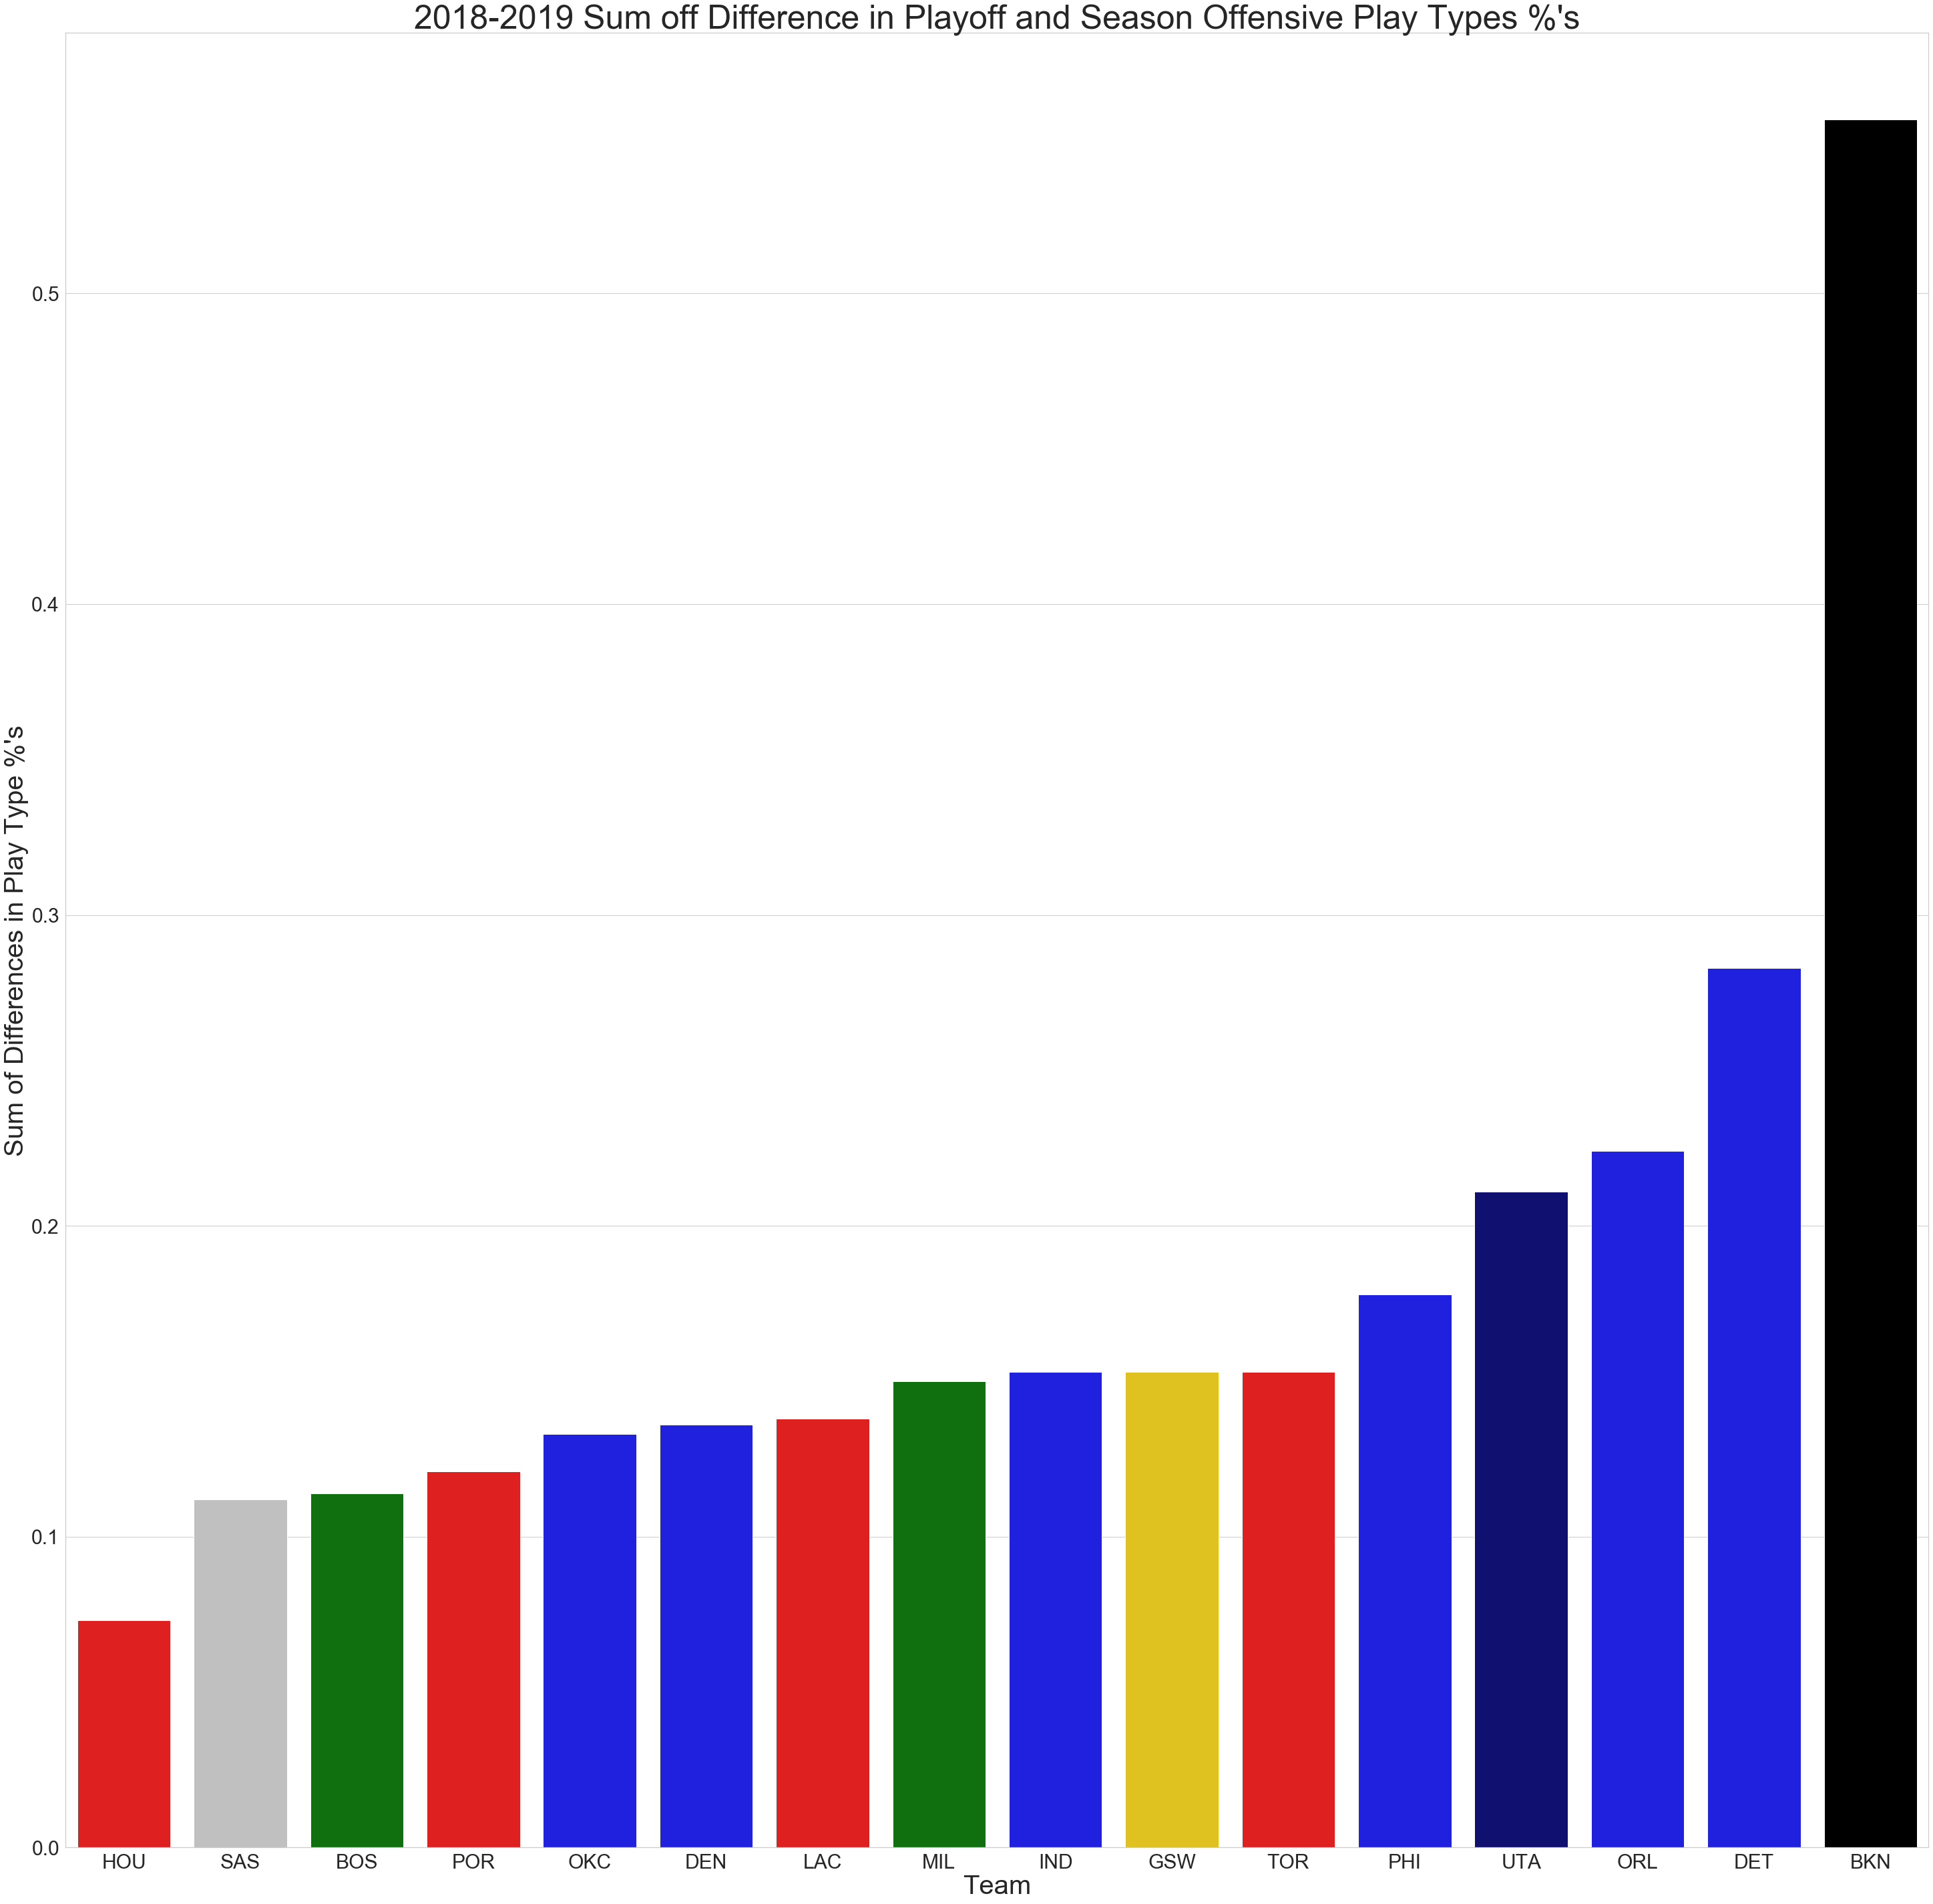

In [5]:
def plot_abs_team_differences(season='2018-2019'):
    x = []
    y = []
    colors = []
    play_types = df['PLAY_TYPE'].unique()
    for team_abbr in list(set(df['TEAM_ABBREVIATION'].values)):
        reg_season_df = df[(df['TEAM_ABBREVIATION']==team_abbr) & (df['Season']==season) 
                           & (df['SeasonType']=='Regular Season')]
        playoffs_df = df[(df['TEAM_ABBREVIATION']==team_abbr) & (df['Season']==season) 
                           & (df['SeasonType']=='Playoffs')]
        reg_season_df.reset_index(inplace=True)
        playoffs_df.reset_index(inplace=True)
        if len(playoffs_df)==0: continue
        diff_df = pd.DataFrame()
        diff_df['Play Type'] = play_types
        diff_df['Season Poss %'] = reg_season_df['POSS_PCT']
        diff_df['Playoff Poss %'] = playoffs_df['POSS_PCT']
        diff_df.fillna(0, inplace=True)
        diff_df['Difference'] = abs(diff_df['Playoff Poss %'] - diff_df['Season Poss %'])
        x.append(team_abbr)
        y.append(sum(diff_df['Difference']))
        colors.append(COLORS[team_abbr]['main_color'])
    sorted_x = [i2 for i1, i2, i3 in sorted(zip(y,x,colors))]
    sorted_colors = [i3 for i1, i2, i3 in sorted(zip(y,x,colors))]
    sorted_y = [i1 for i1, i2, i3 in sorted(zip(y,x,colors))]
    fig, axes = plt.subplots(figsize=(50, 50))
    sns.barplot(x=sorted_x, y=sorted_y, palette=sorted_colors, ax=axes)
    axes.set_title(f"{season} Sum off Difference in Playoff and Season Offensive Play Types %'s", fontsize=50)
    fig.canvas.draw()
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=30)
    y_ticks = list(map(lambda x: str(x.get_text()), axes.get_yticklabels()))
    axes.set_yticklabels(axes.get_yticklabels(), fontsize=30)
    axes.set_xlabel(f'Team', fontsize=40)
    axes.set_ylabel(f"Sum of Differences in Play Type %'s", fontsize=40)
    axes.figure.savefig(f'{season}_play_type_diff_sum.png', bbox_inches='tight', pad_inches=0)
    
plot_abs_team_differences()

Overall, it seems like the more successful teams remain in the middle. Look at the Bucks, Warriors, Raptors, and Philadelphia.

Compare this to the teams that change the **most** (Nets, Pistons, Magic). These teams dropped out of the playoffs **very** quickly (1st round).

Finally, compare this to teams that did not change very much. We look at the Rockets and the Spurs and label them as *dogmatic* often. Houston is unwilling to change their 3-point heavy offense centered around Harden. Similarly, the Spurs remain in the midrange and have a hard time adjusting their play.

As a result, we can, at a glance, say that teams **must** be flexible in their play types. They should be able to adjust a fair amount, but not too much from their regular season play.

### Which play types are bound to drop off from the season in the playoffs? 

Now, we analyze using the play type as the *independent* variable.

For each play type, we create a new row to the DataFrame `df2` with the corresponding `Poss %` and add a tag `Type` to indicate whether it is in the regular season or in the playoffs.

In [6]:
season = '2018-2019'
play_types = df['PLAY_TYPE'].unique()
df2 = pd.DataFrame(columns = ['Play Type', 'Poss %', 'Type'])
for team_abbr in sorted(list(set(df['TEAM_ABBREVIATION'].values))):
    reg_season_df = df[(df['TEAM_ABBREVIATION']==team_abbr) & (df['Season']==season) 
                       & (df['SeasonType']=='Regular Season')]
    playoffs_df = df[(df['TEAM_ABBREVIATION']==team_abbr) & (df['Season']==season) 
                       & (df['SeasonType']=='Playoffs')]
    reg_season_df.reset_index(inplace=True)
    playoffs_df.reset_index(inplace=True)
    if len(playoffs_df)==0: continue
    for pt in play_types:
        if len(reg_season_df[reg_season_df['PLAY_TYPE']==pt])==0:
            reg_season_poss_pct = 0
        else:
            reg_season_poss_pct = reg_season_df[reg_season_df['PLAY_TYPE']==pt]['POSS_PCT'].values[0]
        if len(playoffs_df[playoffs_df['PLAY_TYPE']==pt])==0:
            playoff_poss_pct = 0
        else:
            playoff_poss_pct = playoffs_df[playoffs_df['PLAY_TYPE']==pt]['POSS_PCT'].values[0]
        df2 = df2.append({'Play Type': pt, 'Poss %': reg_season_poss_pct, 'Type': 'Regular Season'}, ignore_index=True)
        df2 = df2.append({'Play Type': pt, 'Poss %': playoff_poss_pct, 'Type': 'Playoffs'}, ignore_index=True)
        
df2   

,Play Type,Poss %,Type
0,Transition,0.135,Regular Season
1,Transition,0.157,Playoffs
2,Isolation,0.081,Regular Season
3,Isolation,0.102,Playoffs
4,PRBallHandler,0.206,Regular Season
...,...,...,...
347,OffScreen,0.019,Playoffs
348,OffRebound,0.053,Regular Season
349,OffRebound,0.065,Playoffs
350,Misc,0.058,Regular Season


Now for each team, we have the `Poss %` for each play type for both the regular season and playoffs.

Let us first visualize this using boxplots.

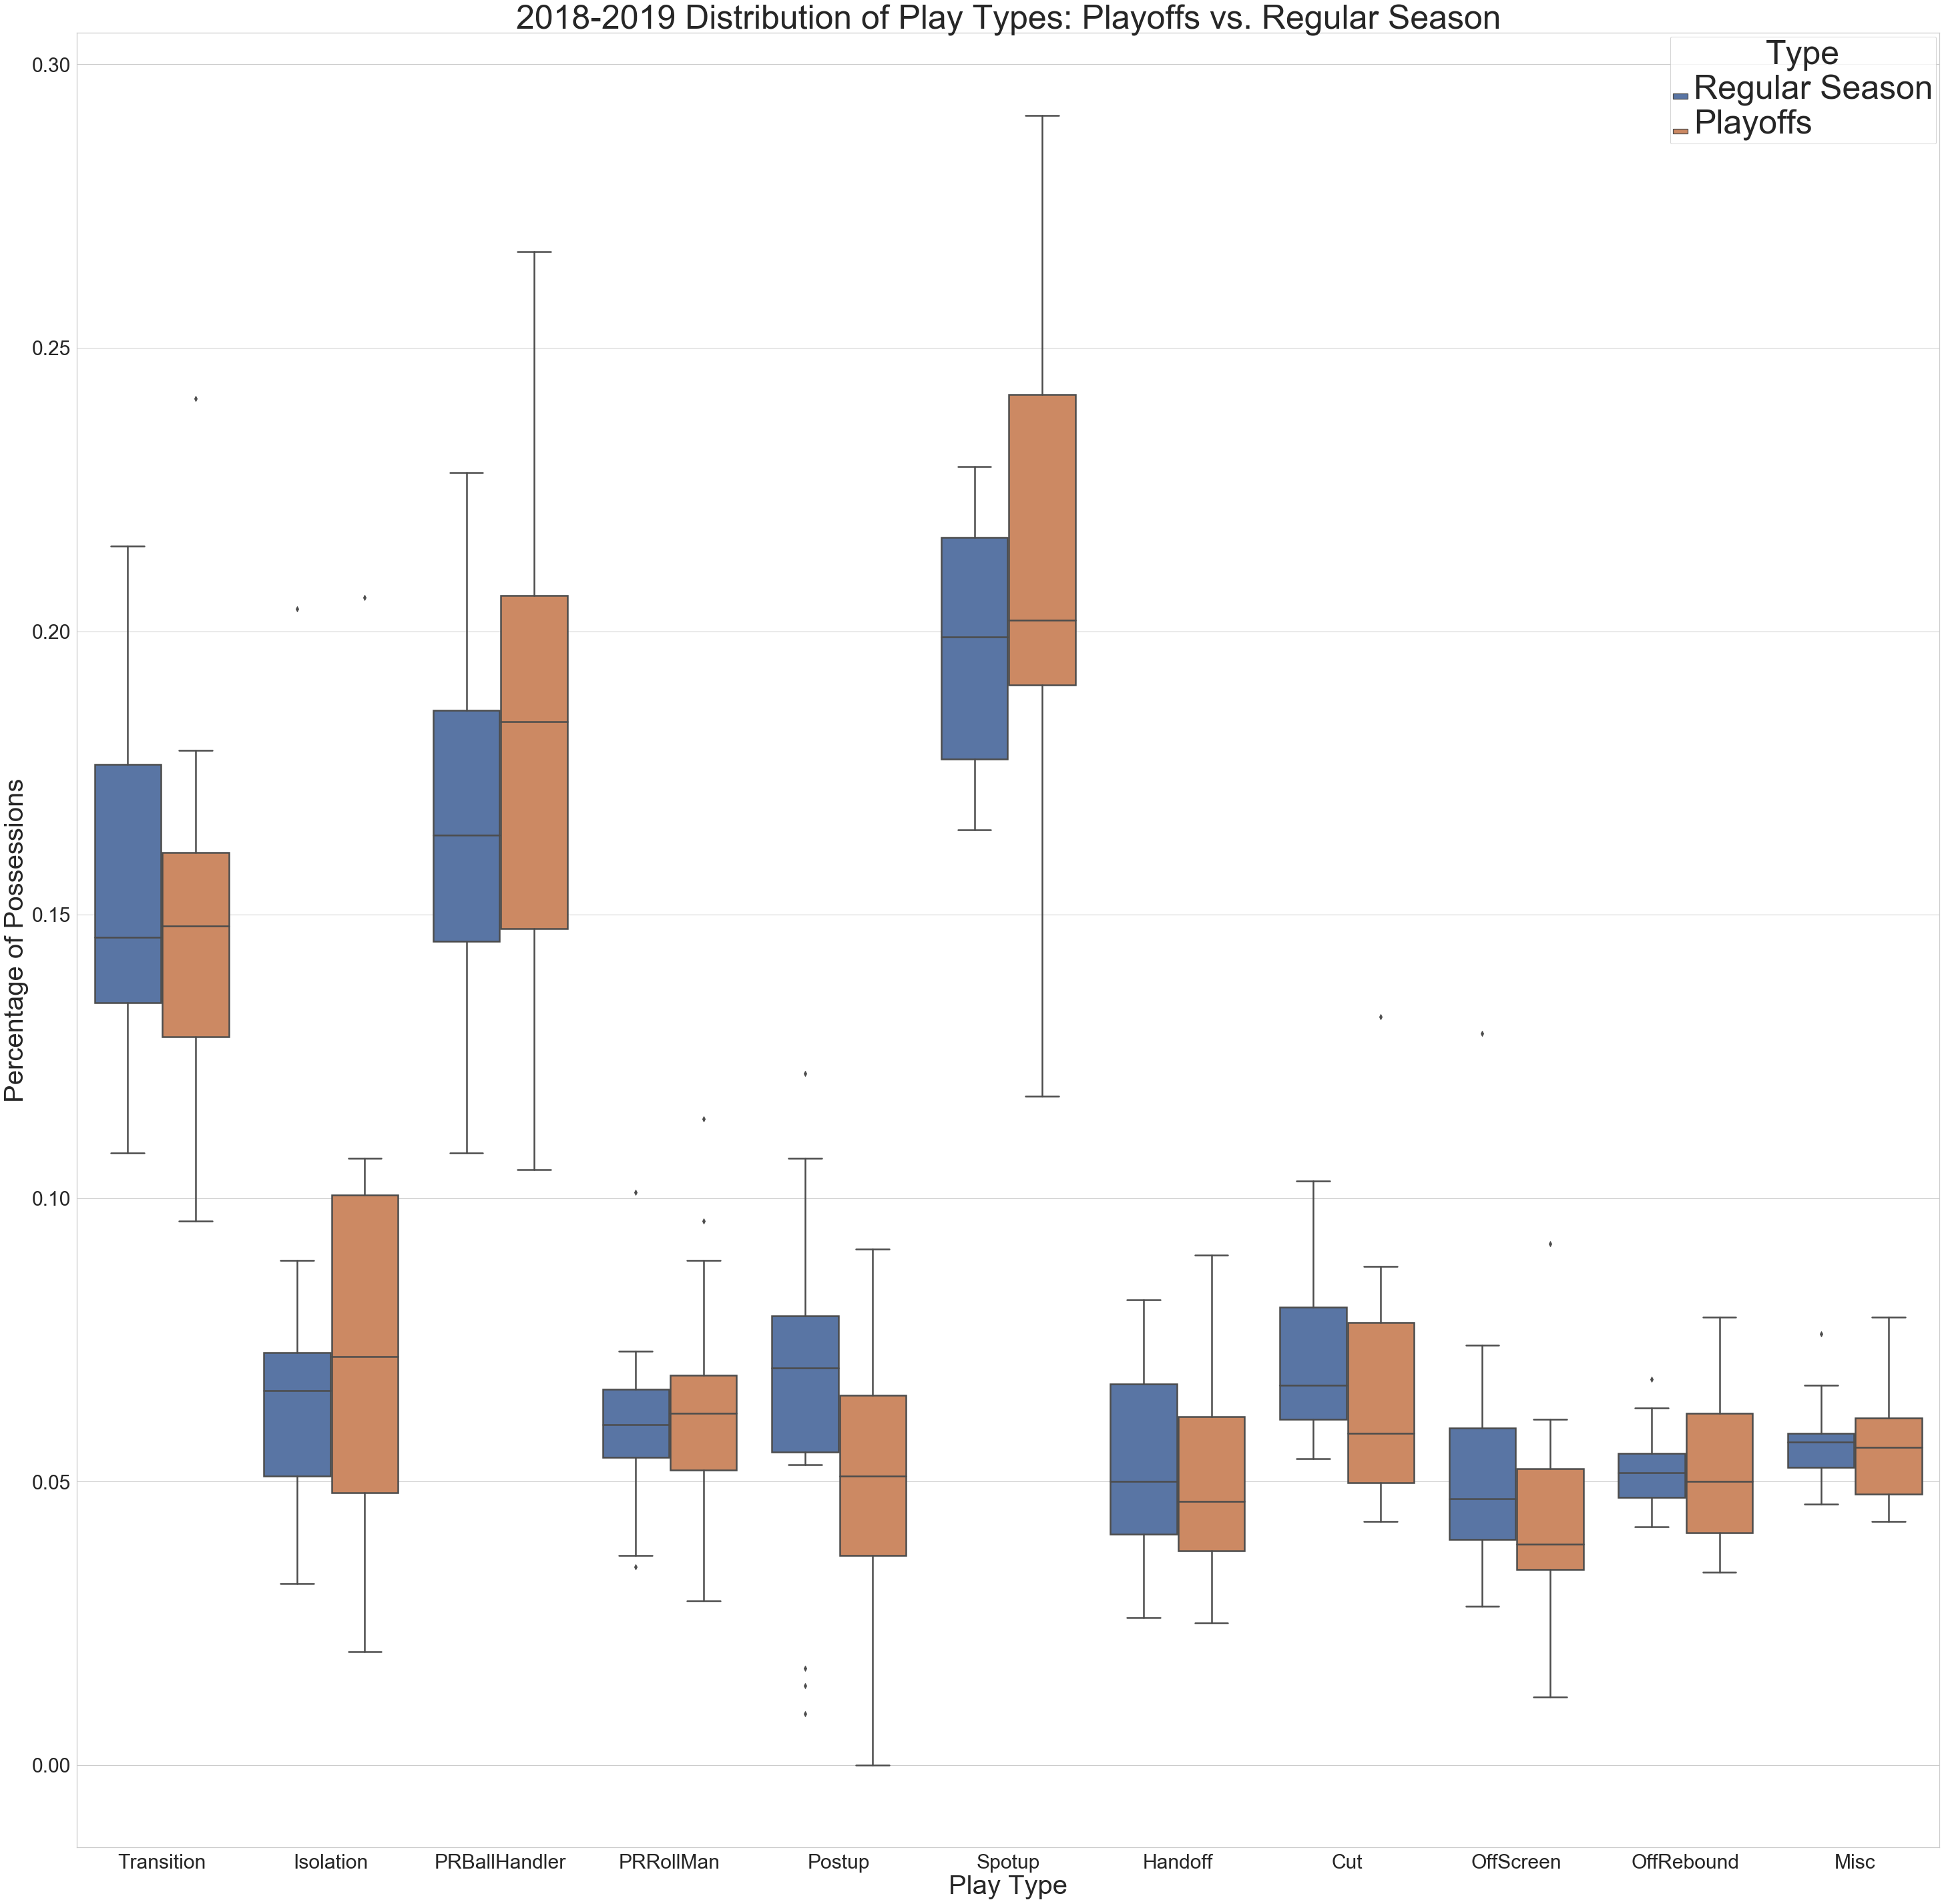

In [7]:
fig, axes = plt.subplots(figsize=(50, 50))
sns.boxplot(x='Play Type', y='Poss %', hue='Type', data=df2, ax=axes, linewidth=2.5)
axes.set_title(f"{season} Distribution of Play Types: Playoffs vs. Regular Season", fontsize=50)
fig.canvas.draw()
axes.set_xticklabels(axes.get_xticklabels(), fontsize=30)
plt.setp(axes.get_legend().get_texts(), fontsize=50) # for legend text
plt.setp(axes.get_legend().get_title(), fontsize=50) # for legend title
y_ticks = list(map(lambda x: str(x.get_text()), axes.get_yticklabels()))
axes.set_yticklabels(axes.get_yticklabels(), fontsize=30)
axes.set_xlabel(f'Play Type', fontsize=40)
axes.set_ylabel(f"Percentage of Possessions", fontsize=40)
axes.figure.savefig(f'{season}_play_type_distr_box.png', bbox_inches='tight', pad_inches=0)

Here, we can clearly see the distributions. Some general takeaways:

* The most popular play types remain primarly the same (Spotup, PRBallHandler, and Transition)
* Distributions during the playoffs are much larger (i.e. the orange boxes are generally taller than the blue ones). This indicates that teams are much more varied in their offensive play types in the playoffs.

Let's simplify things and make a simple bar plot using the same data.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


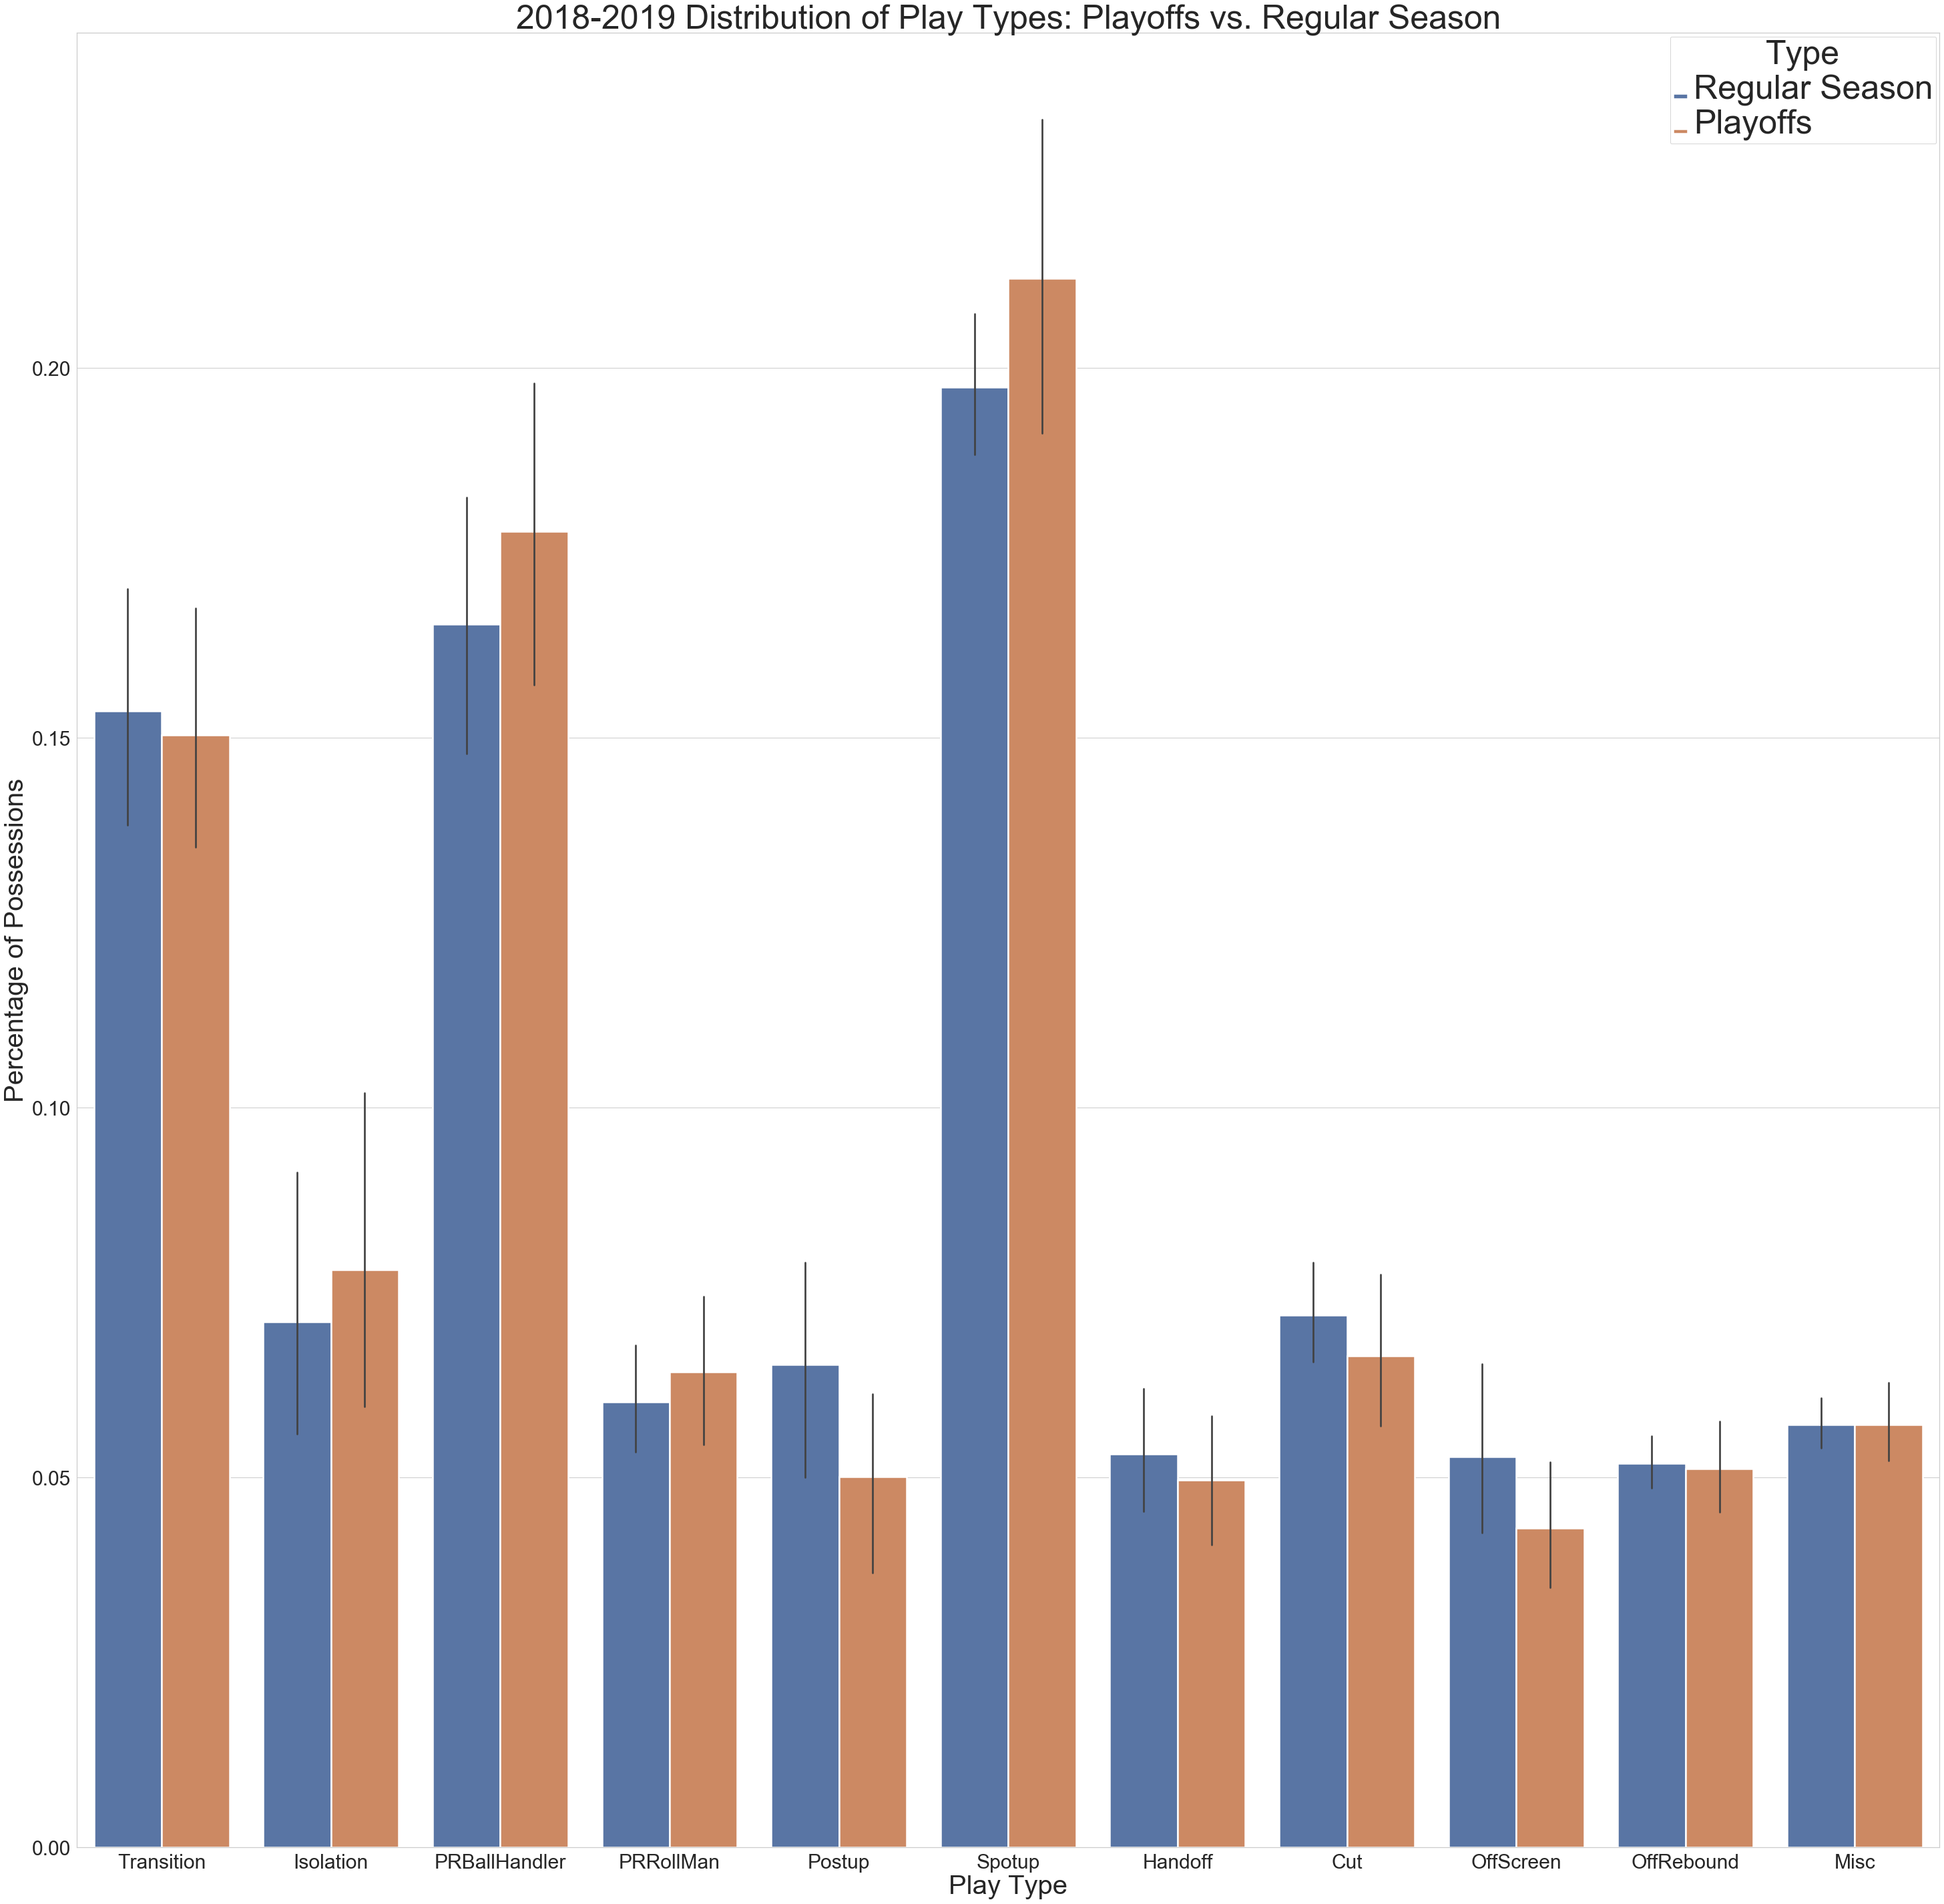

In [8]:
fig, axes = plt.subplots(figsize=(50, 50))
sns.barplot(x='Play Type', y='Poss %', hue='Type', data=df2, ax=axes, linewidth=2.5)
axes.set_title(f"{season} Distribution of Play Types: Playoffs vs. Regular Season", fontsize=50)
fig.canvas.draw()
axes.set_xticklabels(axes.get_xticklabels(), fontsize=30)
plt.setp(axes.get_legend().get_texts(), fontsize=50) # for legend text
plt.setp(axes.get_legend().get_title(), fontsize=50) # for legend title
y_ticks = list(map(lambda x: str(x.get_text()), axes.get_yticklabels()))
axes.set_yticklabels(axes.get_yticklabels(), fontsize=30)
axes.set_xlabel(f'Play Type', fontsize=40)
axes.set_ylabel(f"Percentage of Possessions", fontsize=40)
axes.figure.savefig(f'{season}_play_type_distr_bar.png', bbox_inches='tight', pad_inches=0)

Here, we can clearly identify differences using the [95% Confidence Interval](https://en.wikipedia.org/wiki/Confidence_interval) illustrated using the vertical lines on the above plot.

We see that the difference in Regular Season and Playoff Play Type distributions is not statistically significant **except**:

### Post Ups
Post Ups decrease greatly in the playoffs. This goes against the premise that 'teams need to be able to dump the ball to the big man in the post in the playoffs'.

### Spotup
Spot Ups increase greatly in the playoffs. These are plays where players *do not* come off a screen, but end up catching the ball coming off of a screen and either shooting immediately, dribbling into a pull up, dribbling into a floater, or dribbling and taking a shot at the rim.

# Overall Conclusions
* Successful teams do not change their offenses too much (compared to BKN, DET, ORL)
* Successful teams should also not be too dogmatic (compared to HOU, SAS)
* Post Ups decrease in the playoffs. Teams do not need a big man to dump it down to in the playoffs.
* Spotups increase in the playoffs. Teams should be able to pass to individuals and have them run the offense individually.
* Contrary to popular belief, isolation does not increase in the playoffs.

# Appendix
For those interested, here are the same plots for seasons since all Synergy Data has been released:

In [9]:
def plot_play_types(season='2018-2019'):
    play_types = df['PLAY_TYPE'].unique()
    df2 = pd.DataFrame(columns = ['Play Type', 'Poss %', 'Type'])
    for team_abbr in sorted(list(set(df['TEAM_ABBREVIATION'].values))):
        reg_season_df = df[(df['TEAM_ABBREVIATION']==team_abbr) & (df['Season']==season) 
                           & (df['SeasonType']=='Regular Season')]
        playoffs_df = df[(df['TEAM_ABBREVIATION']==team_abbr) & (df['Season']==season) 
                           & (df['SeasonType']=='Playoffs')]
        reg_season_df.reset_index(inplace=True)
        playoffs_df.reset_index(inplace=True)
        if len(playoffs_df)==0: continue
        for pt in play_types:
            if len(reg_season_df[reg_season_df['PLAY_TYPE']==pt])==0:
                reg_season_poss_pct = 0
            else:
                reg_season_poss_pct = reg_season_df[reg_season_df['PLAY_TYPE']==pt]['POSS_PCT'].values[0]
            if len(playoffs_df[playoffs_df['PLAY_TYPE']==pt])==0:
                playoff_poss_pct = 0
            else:
                playoff_poss_pct = playoffs_df[playoffs_df['PLAY_TYPE']==pt]['POSS_PCT'].values[0]
            df2 = df2.append({'Play Type': pt, 'Poss %': reg_season_poss_pct, 'Type': 'Regular Season'}, ignore_index=True)
            df2 = df2.append({'Play Type': pt, 'Poss %': playoff_poss_pct, 'Type': 'Playoffs'}, ignore_index=True)
    fig, axes = plt.subplots(figsize=(50, 50))
    sns.boxplot(x='Play Type', y='Poss %', hue='Type', data=df2, ax=axes, linewidth=2.5)
    axes.set_title(f"{season} Distribution of Play Types: Playoffs vs. Regular Season", fontsize=50)
    fig.canvas.draw()
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=30)
    plt.setp(axes.get_legend().get_texts(), fontsize=50) # for legend text
    plt.setp(axes.get_legend().get_title(), fontsize=50) # for legend title
    y_ticks = list(map(lambda x: str(x.get_text()), axes.get_yticklabels()))
    axes.set_yticklabels(axes.get_yticklabels(), fontsize=30)
    axes.set_xlabel(f'Play Type', fontsize=40)
    axes.set_ylabel(f"Percentage of Possessions", fontsize=40)
    axes.figure.savefig(f'{season}_play_type_distr_box.png', bbox_inches='tight', pad_inches=0)
    
    fig, axes = plt.subplots(figsize=(50, 50))
    sns.barplot(x='Play Type', y='Poss %', hue='Type', data=df2, ax=axes, linewidth=2.5)
    axes.set_title(f"{season} Distribution of Play Types: Playoffs vs. Regular Season", fontsize=50)
    fig.canvas.draw()
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=30)
    plt.setp(axes.get_legend().get_texts(), fontsize=50) # for legend text
    plt.setp(axes.get_legend().get_title(), fontsize=50) # for legend title
    y_ticks = list(map(lambda x: str(x.get_text()), axes.get_yticklabels()))
    axes.set_yticklabels(axes.get_yticklabels(), fontsize=30)
    axes.set_xlabel(f'Play Type', fontsize=40)
    axes.set_ylabel(f"Percentage of Possessions", fontsize=40)
    axes.figure.savefig(f'{season}_play_type_distr_bar.png', bbox_inches='tight', pad_inches=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


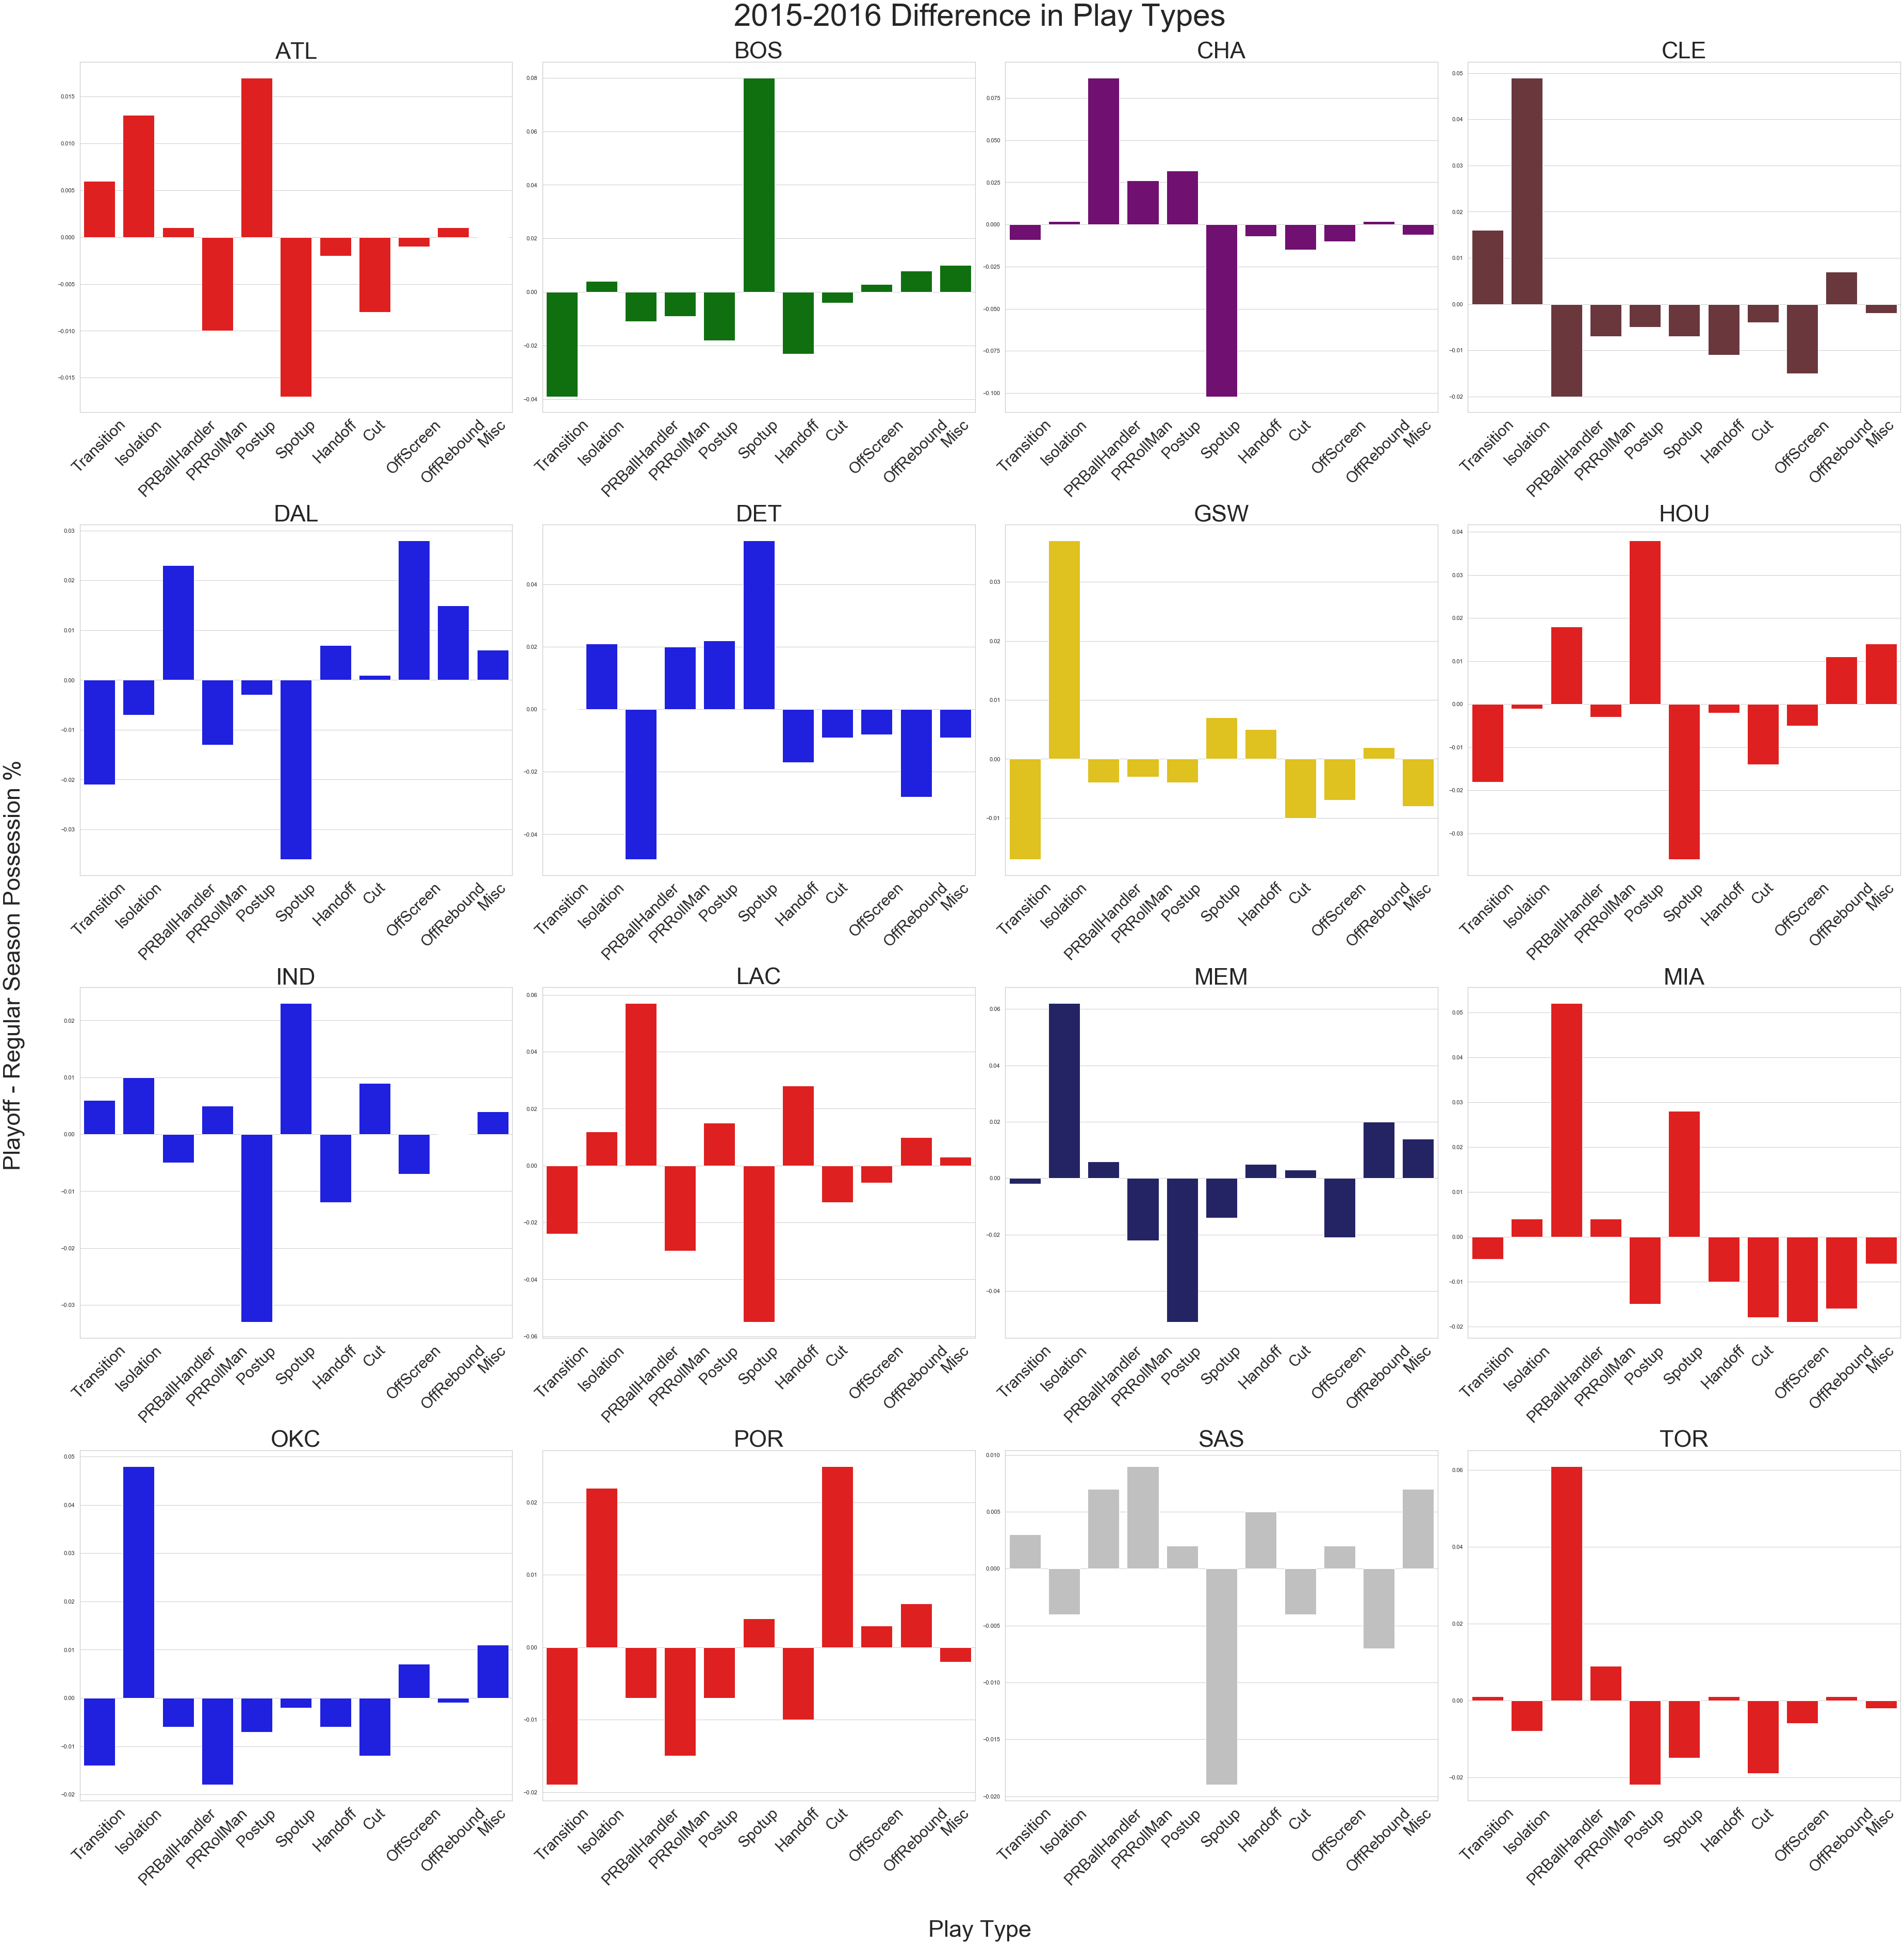

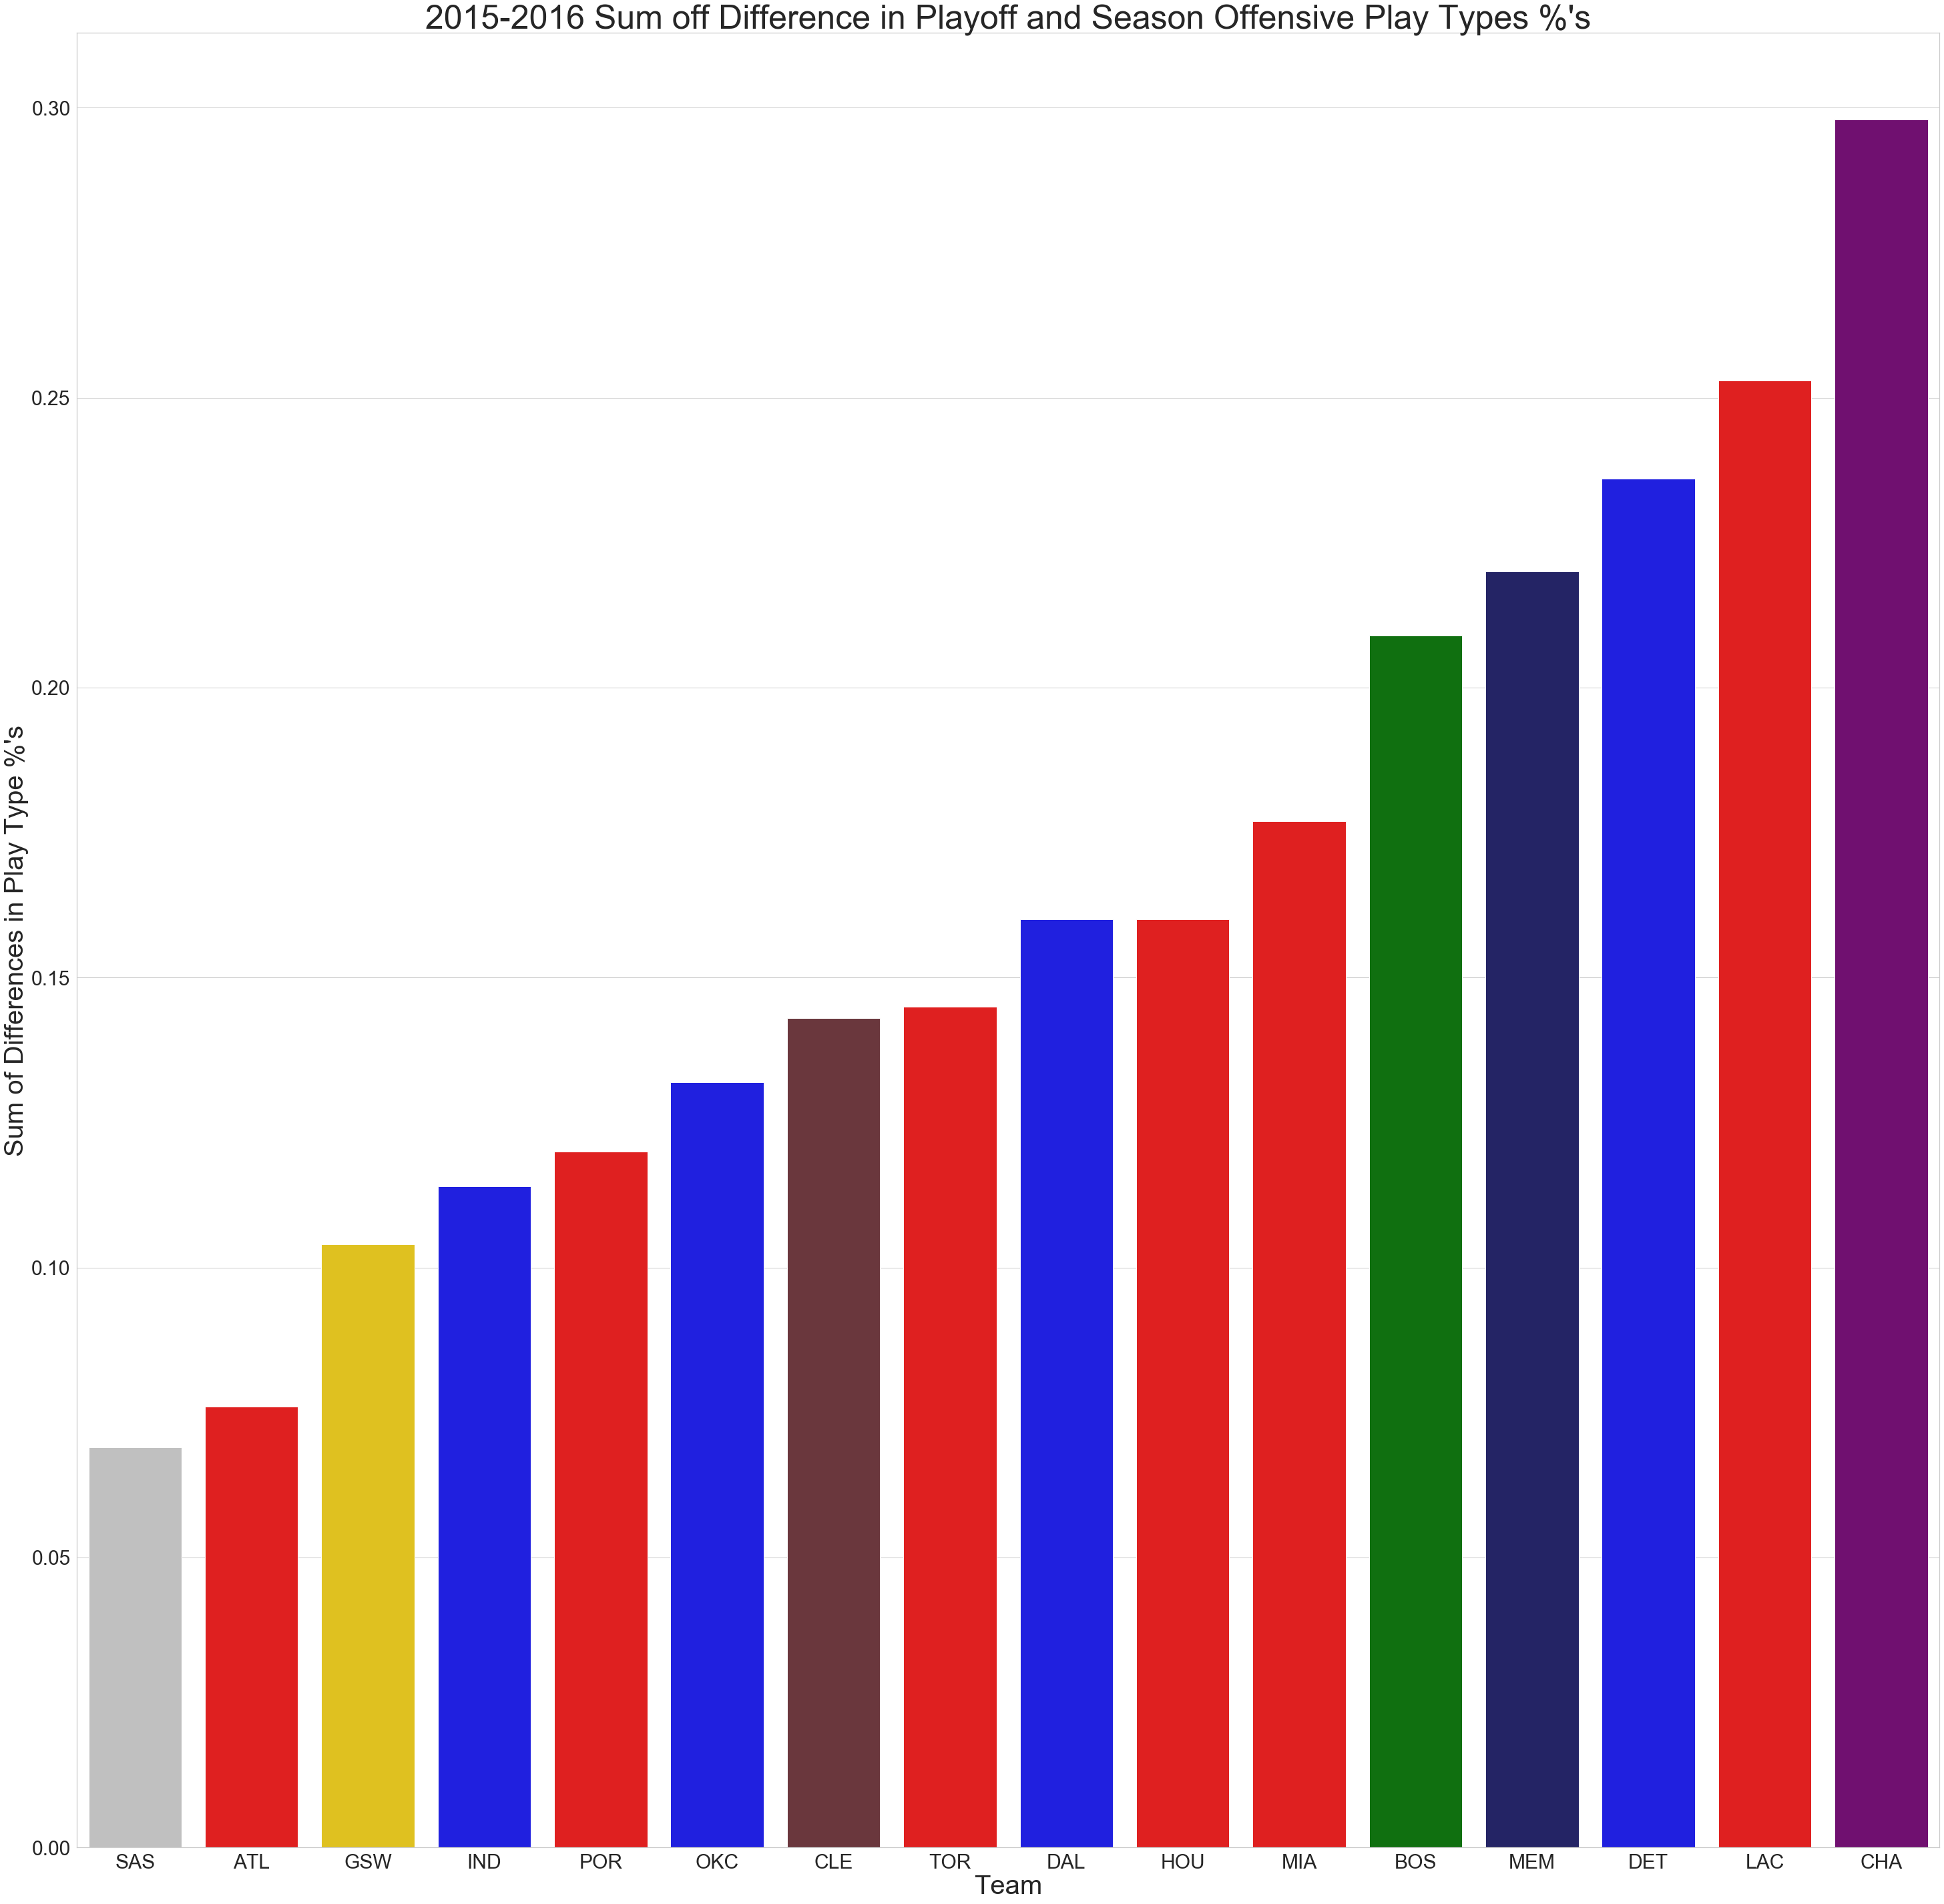

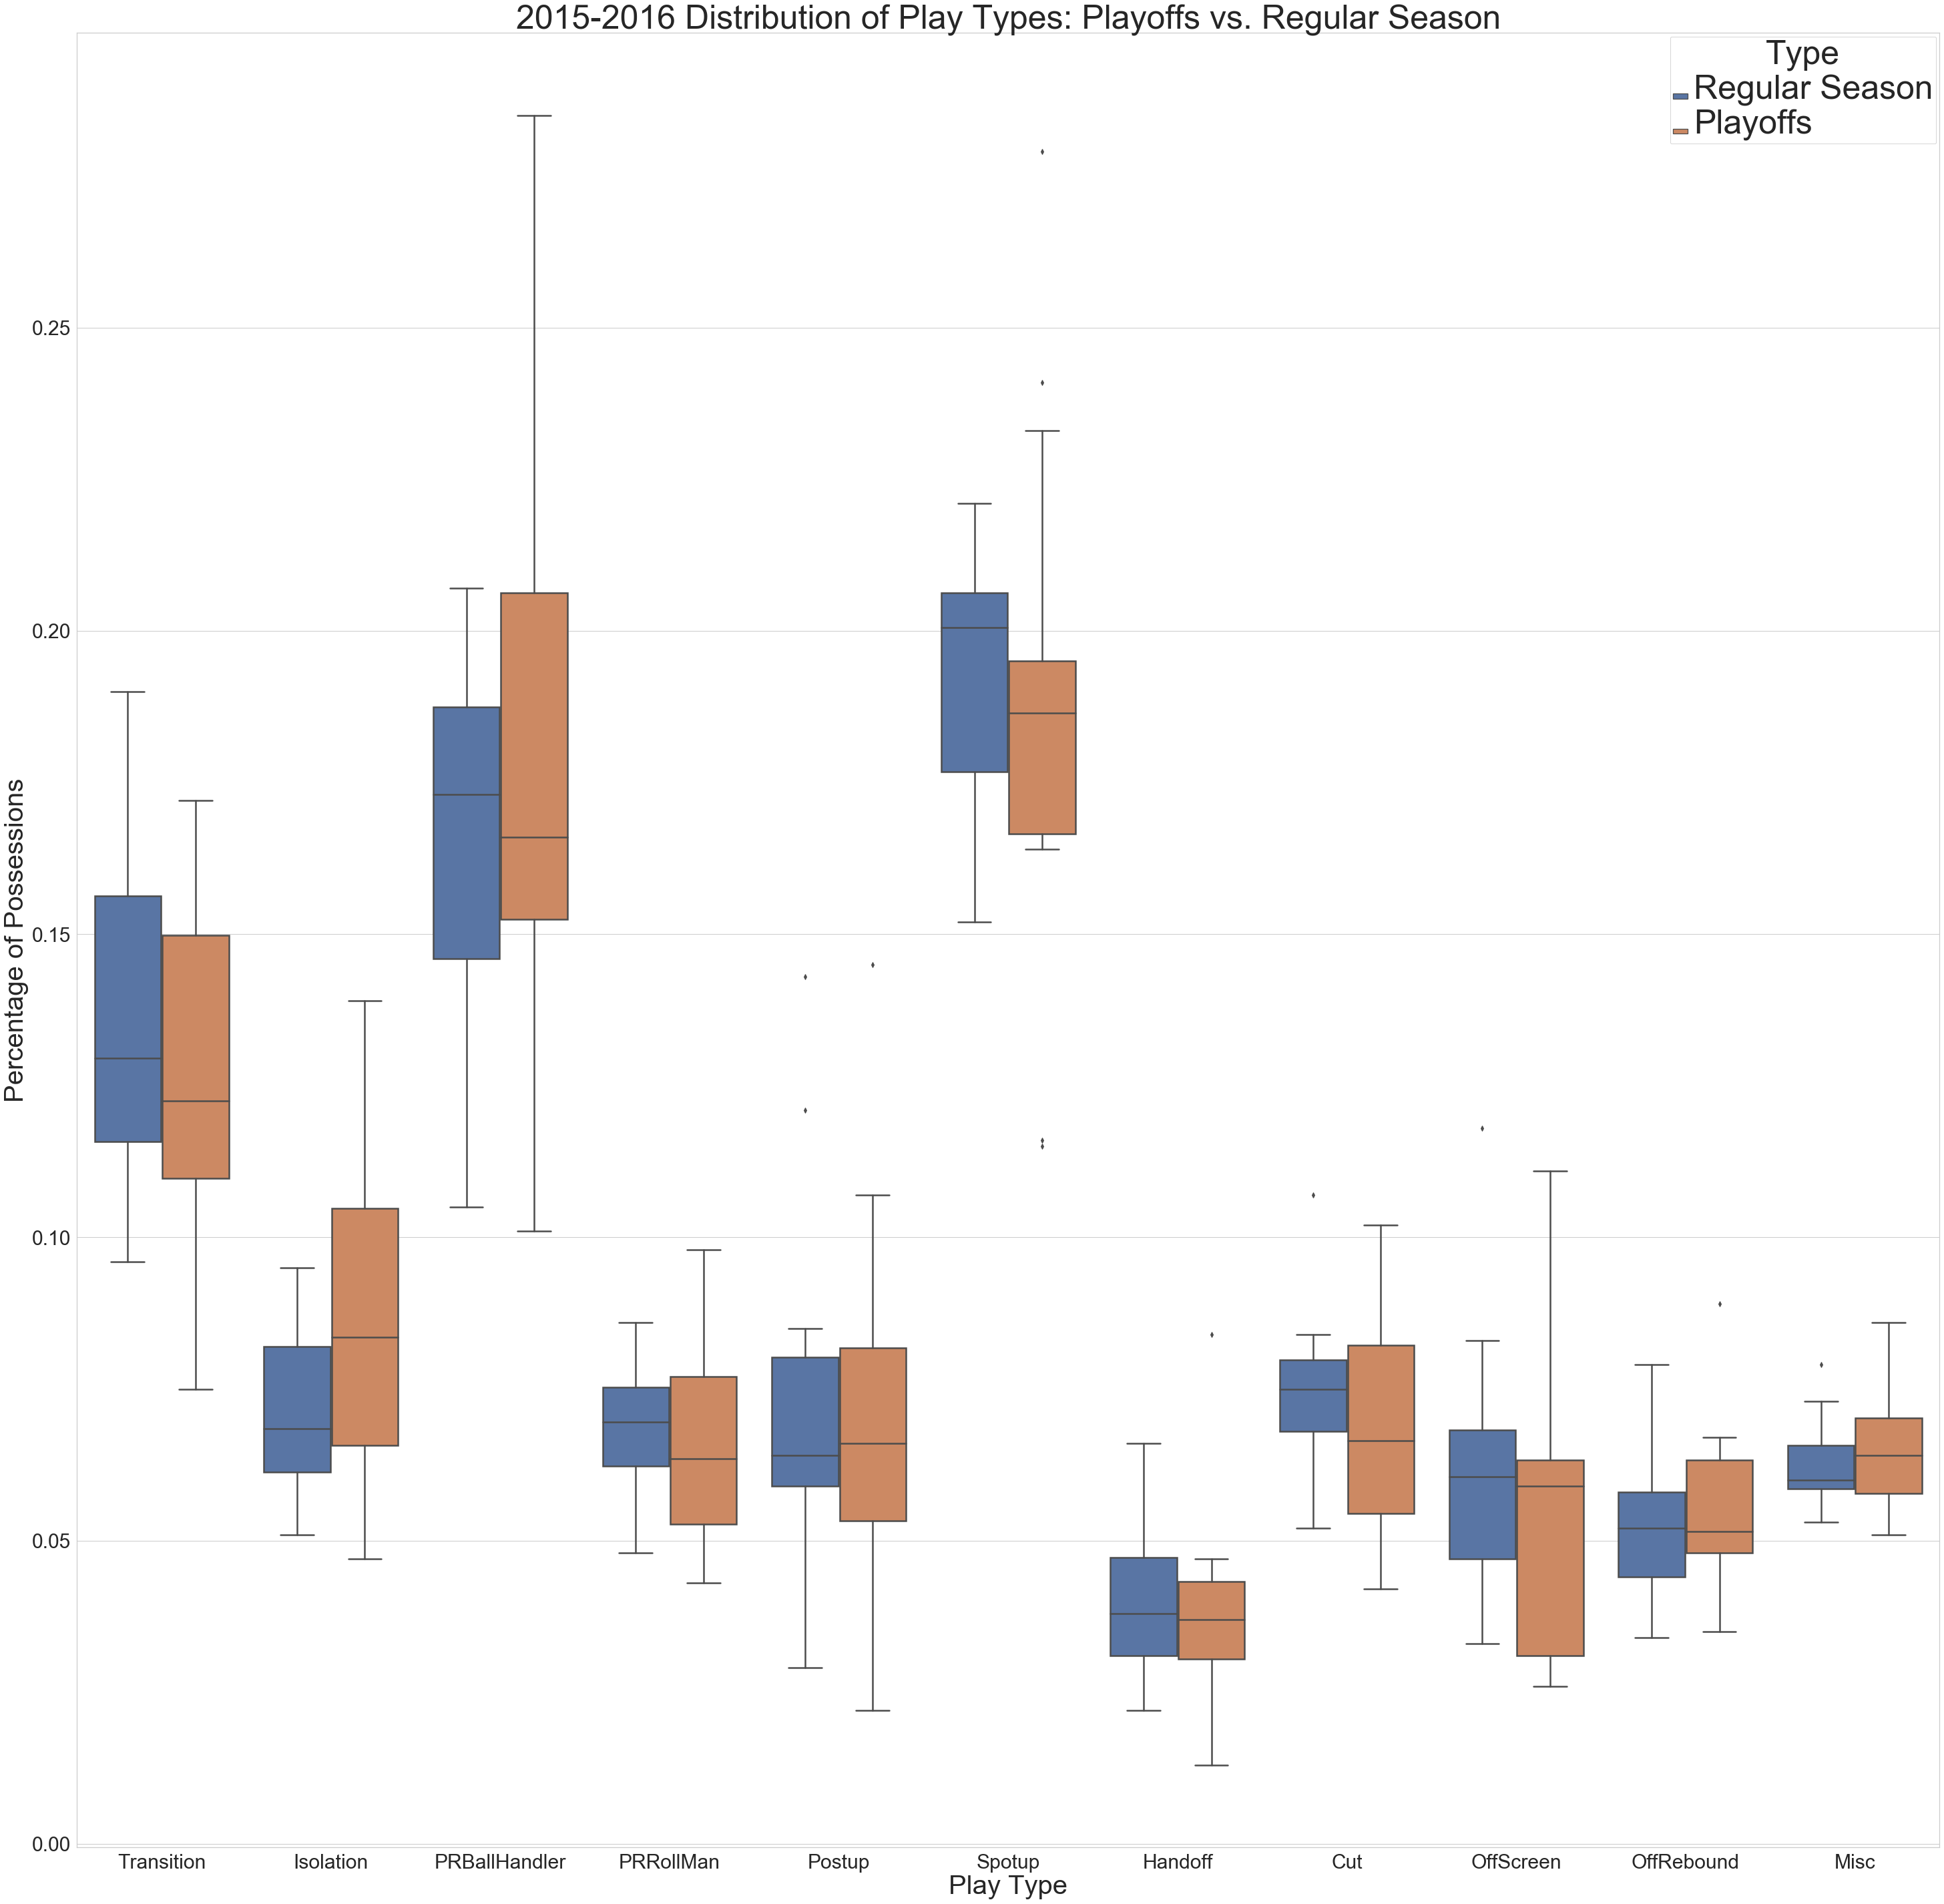

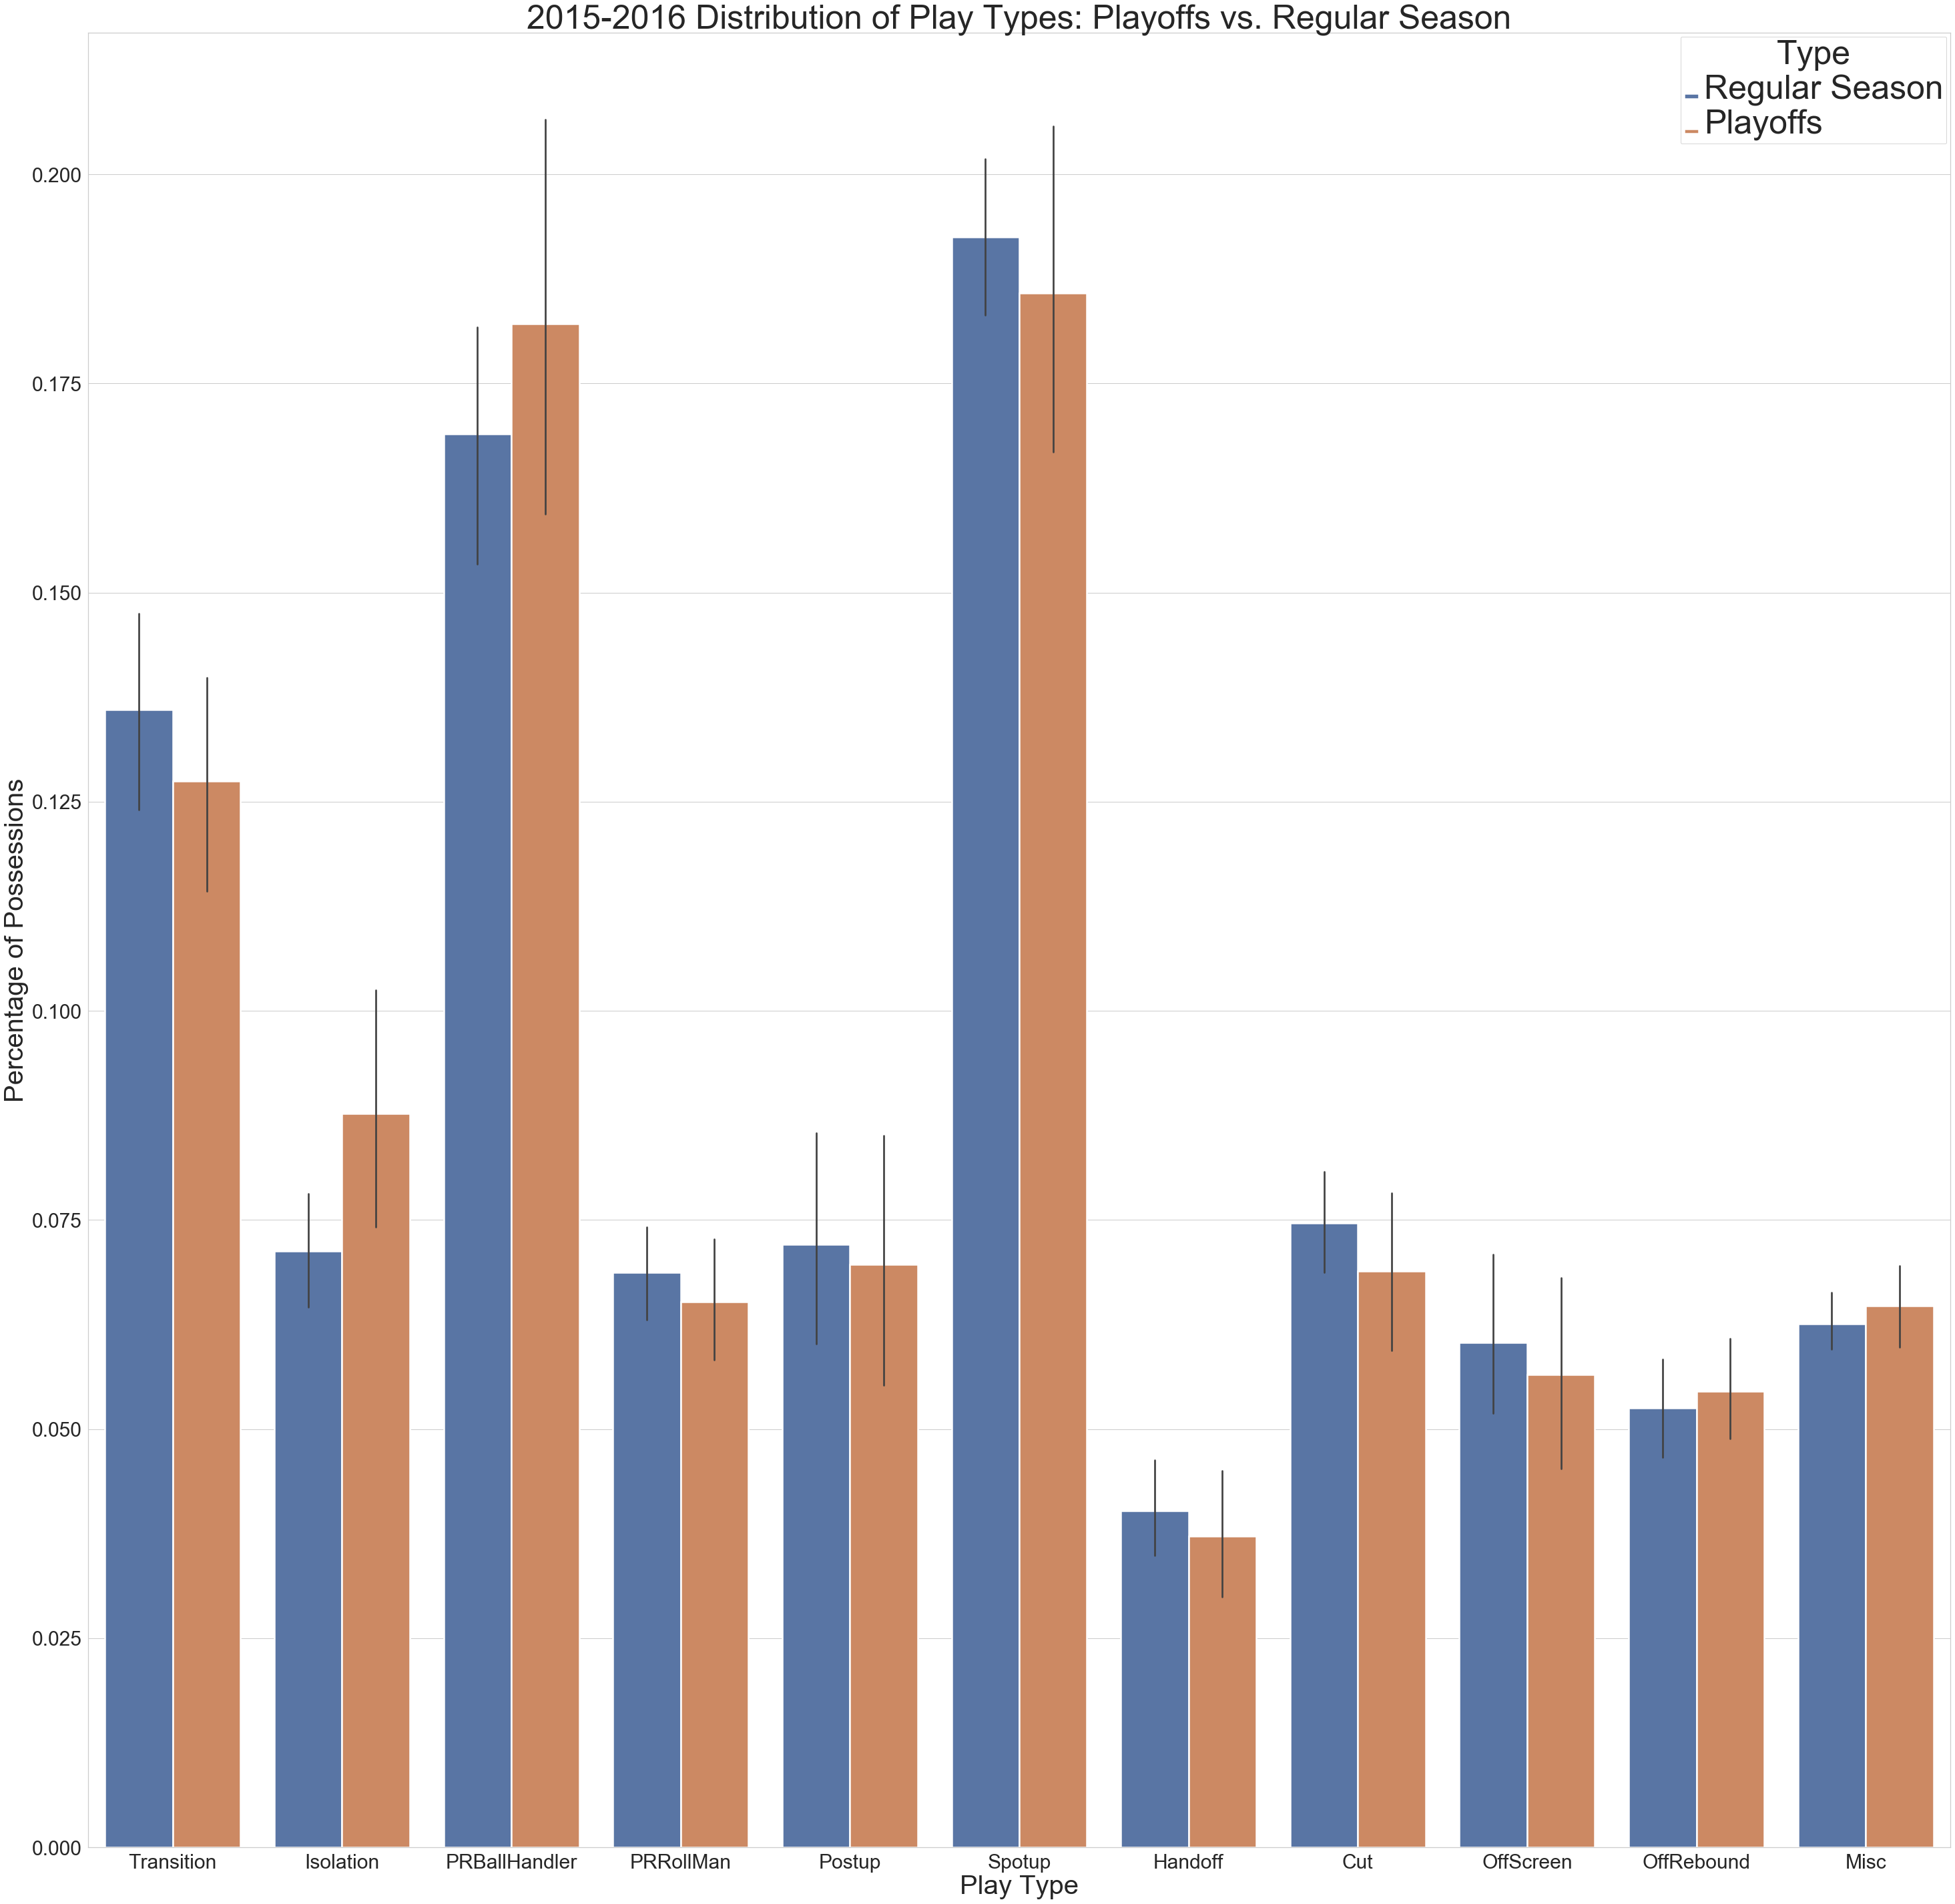

In [10]:
season = '2015-2016'
plot_team_differences(season=season)
plot_abs_team_differences(season=season)
plot_play_types(season=season)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


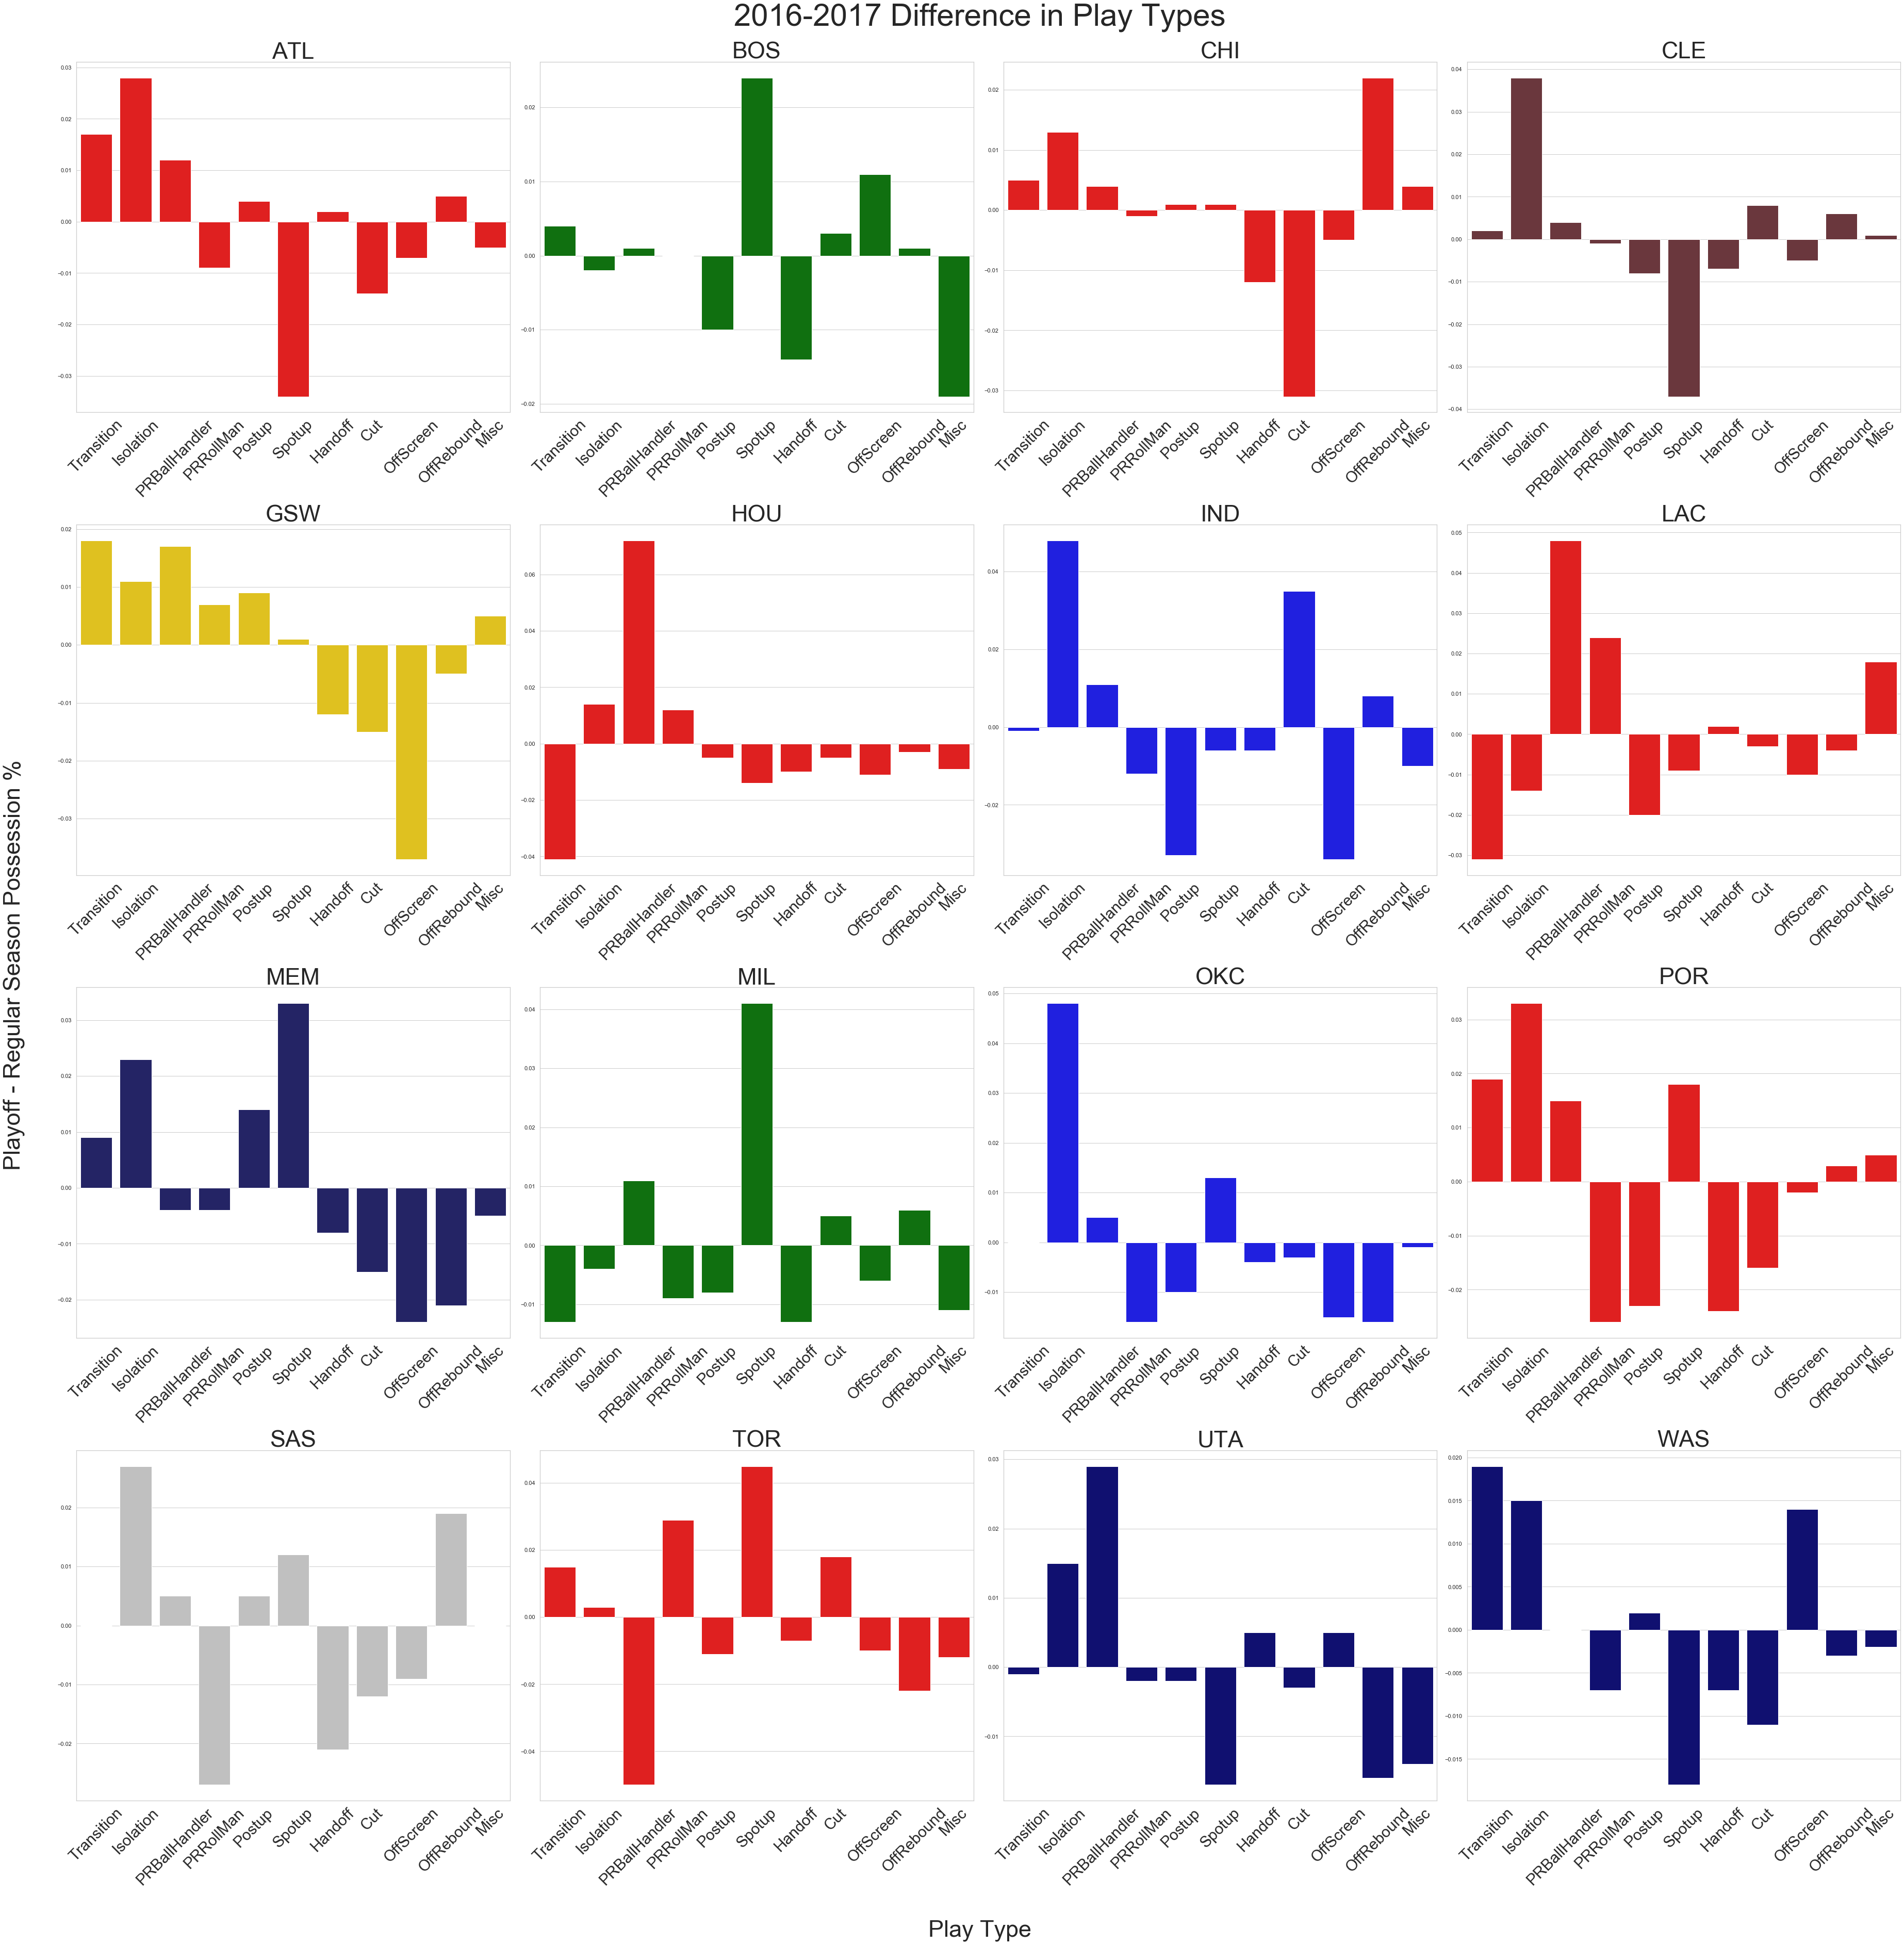

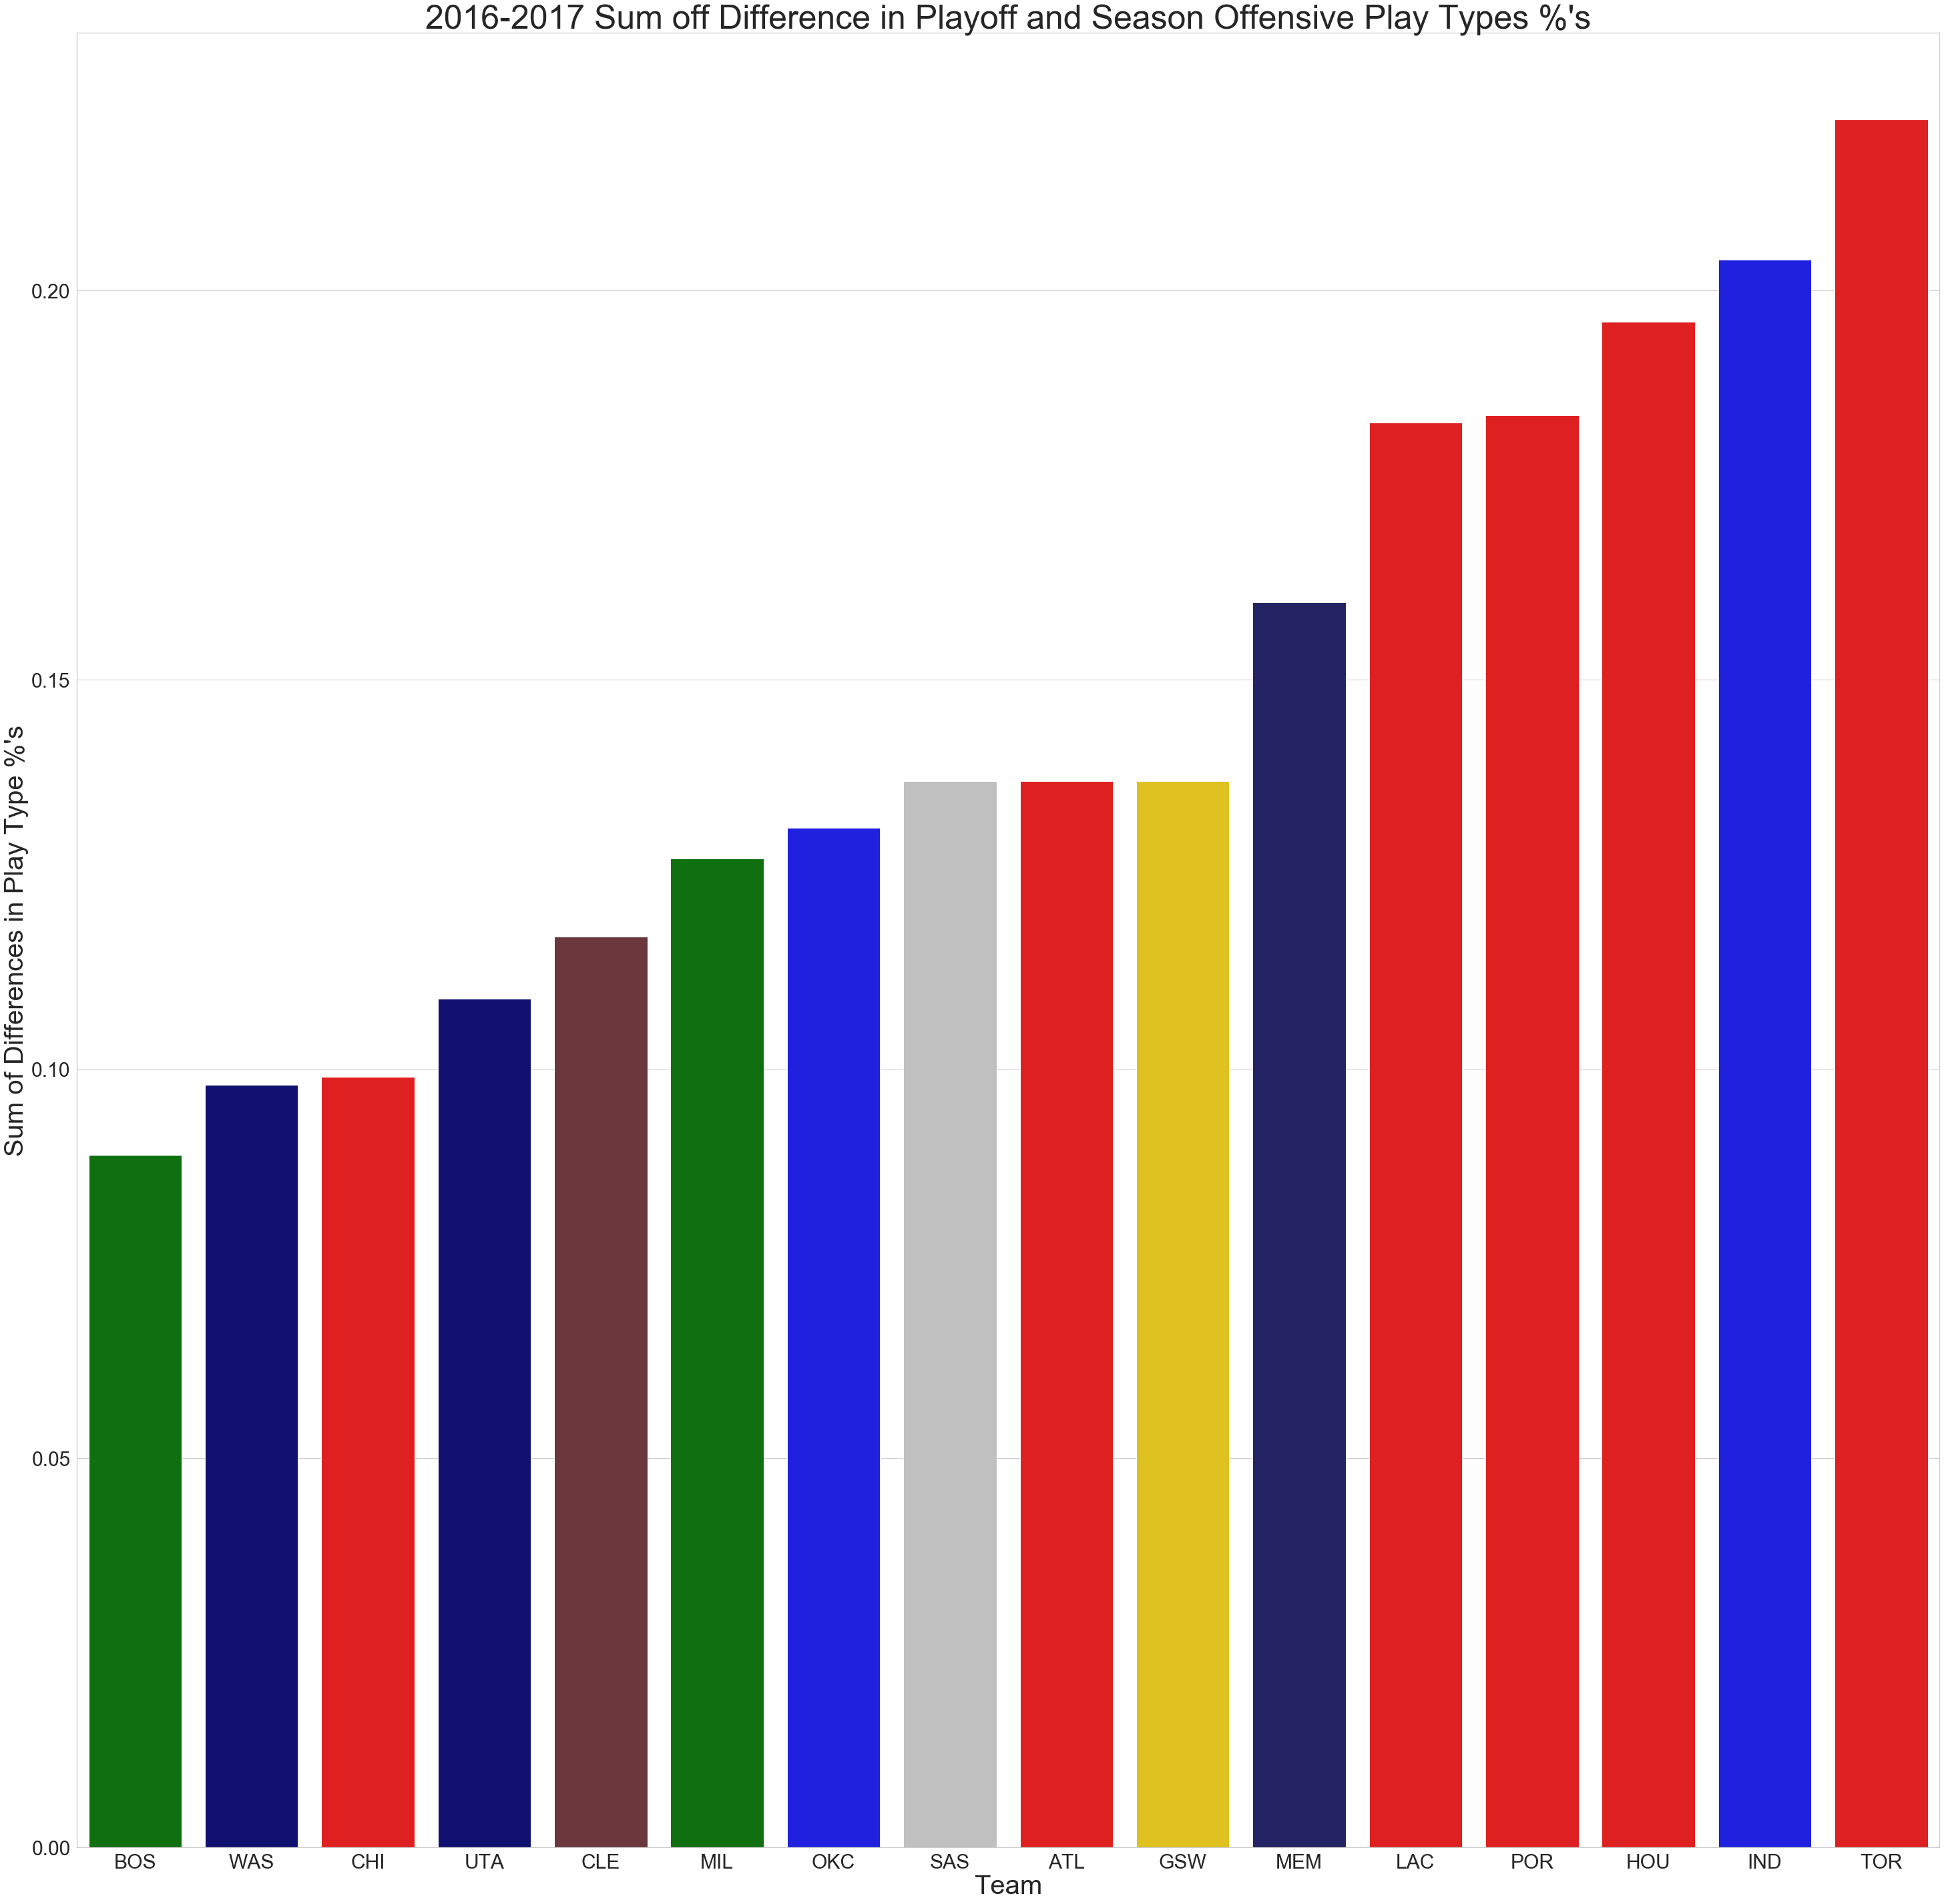

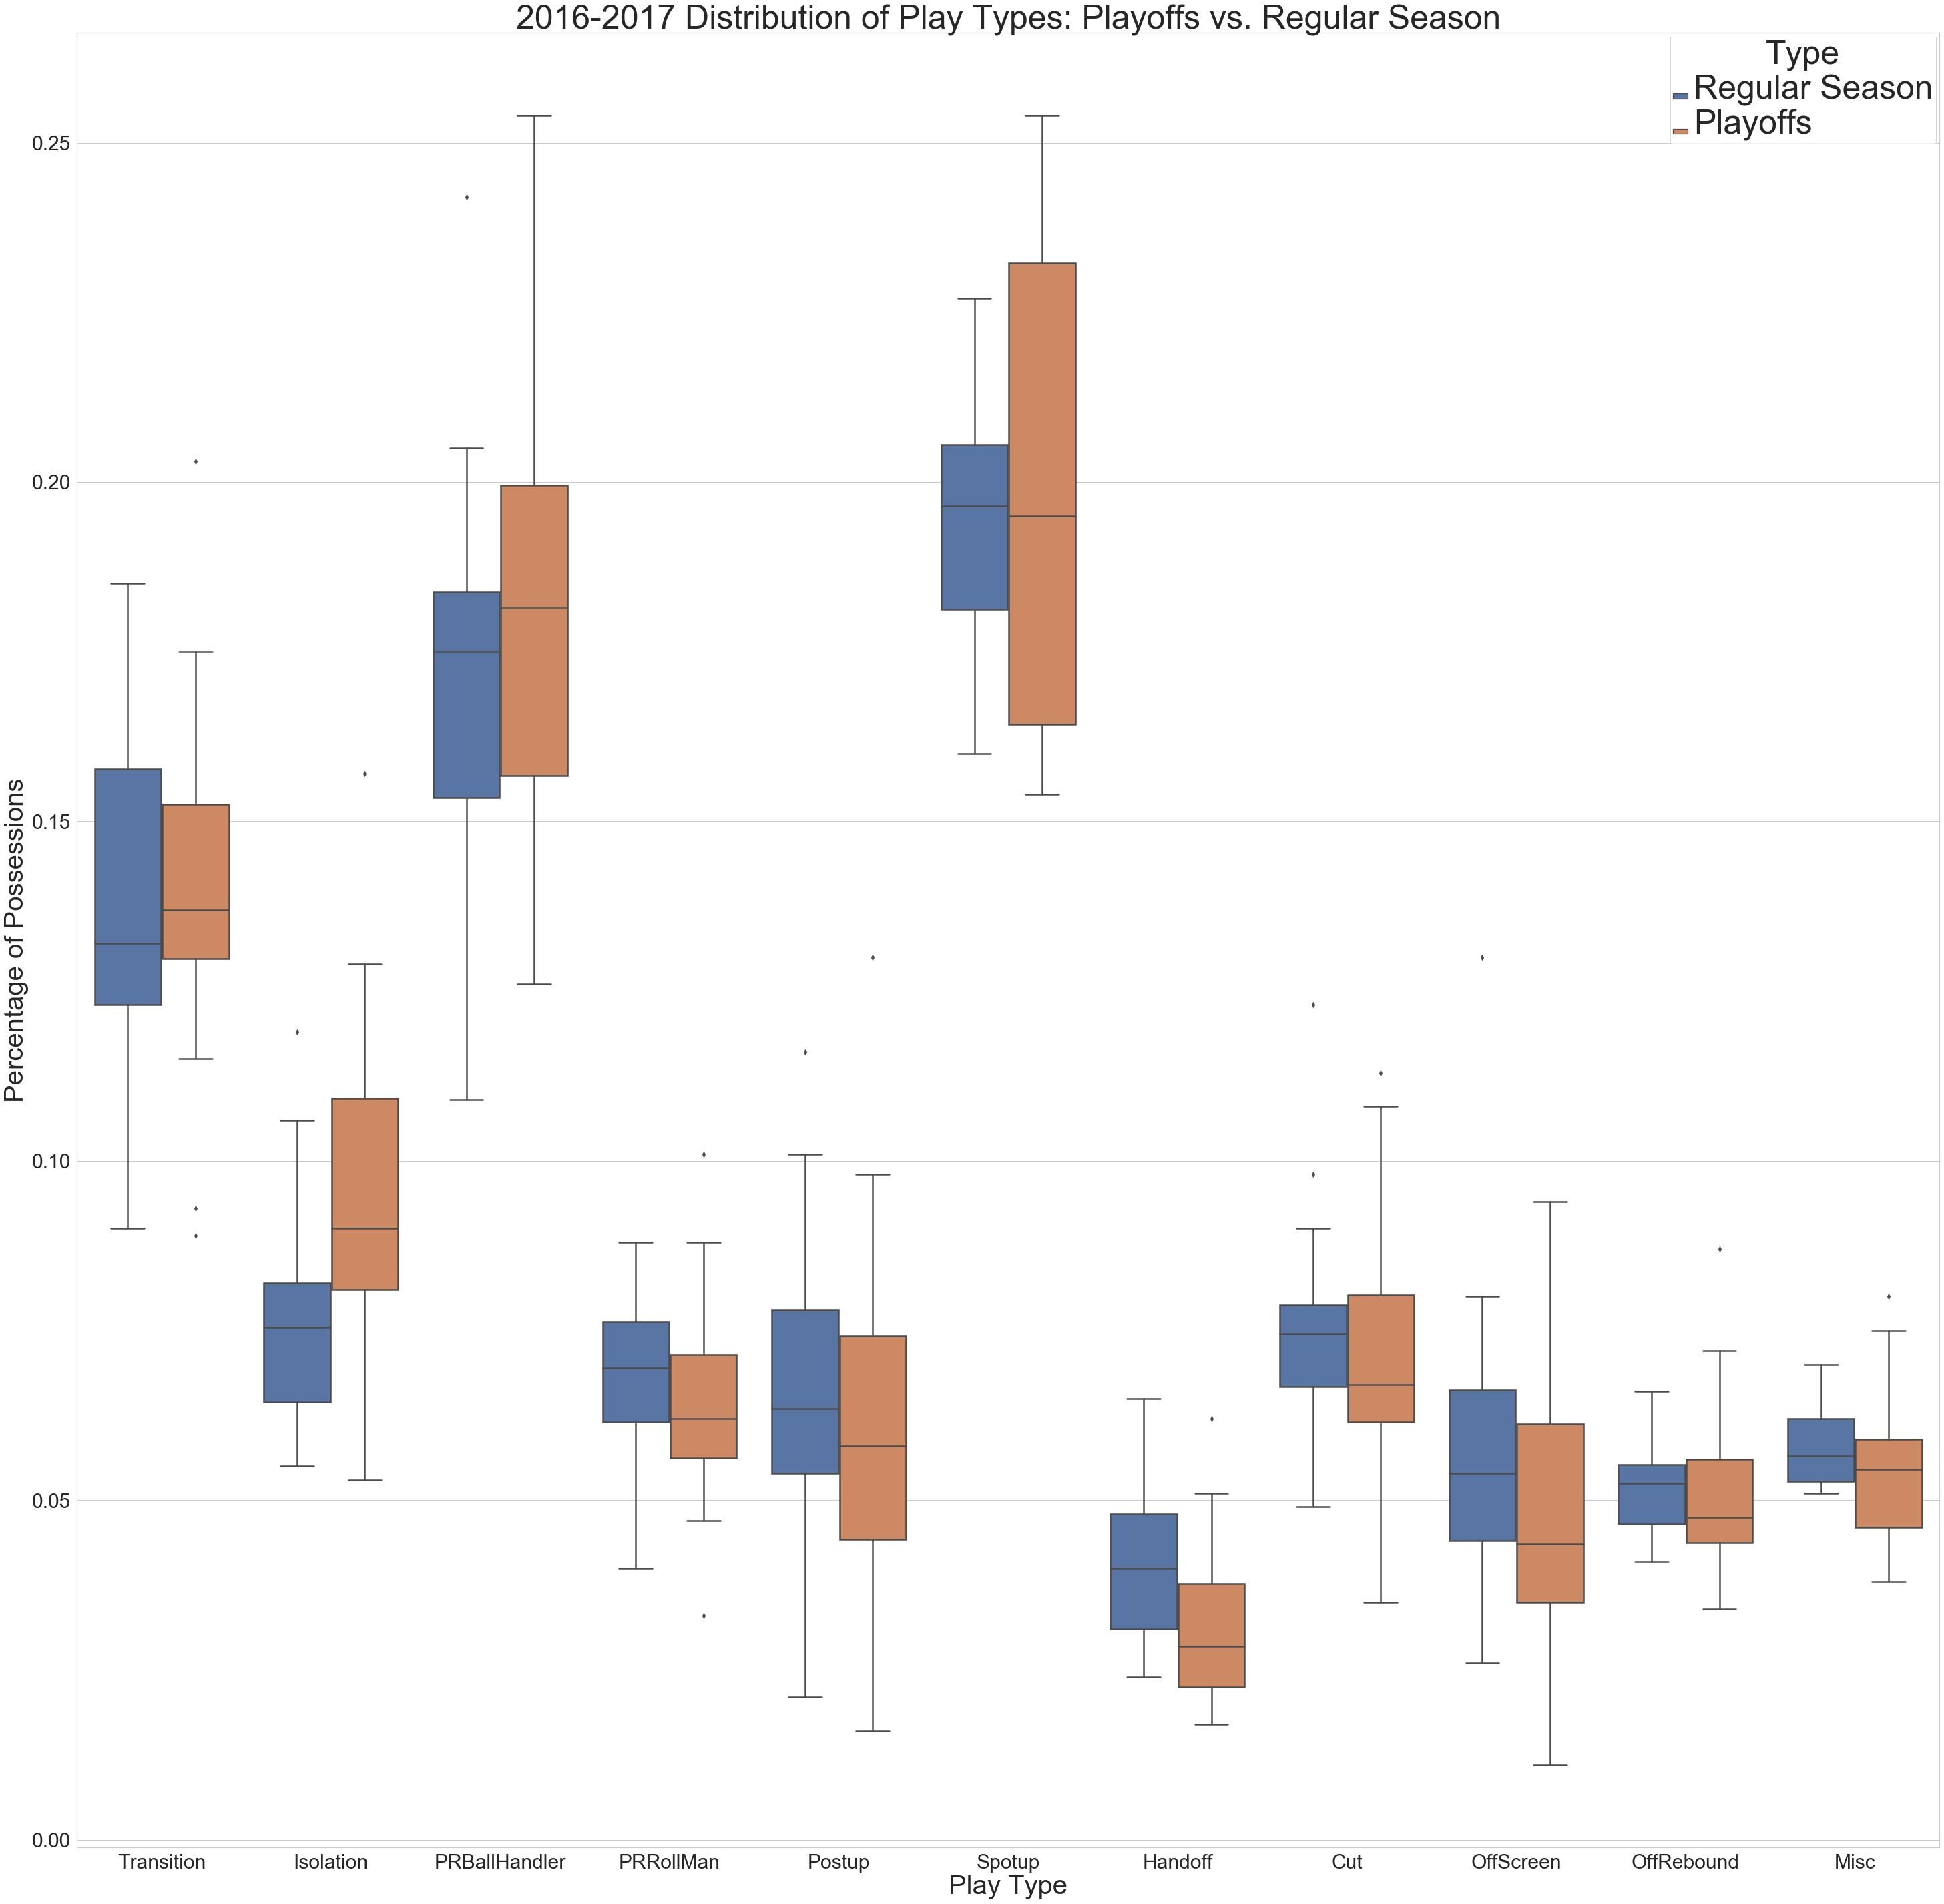

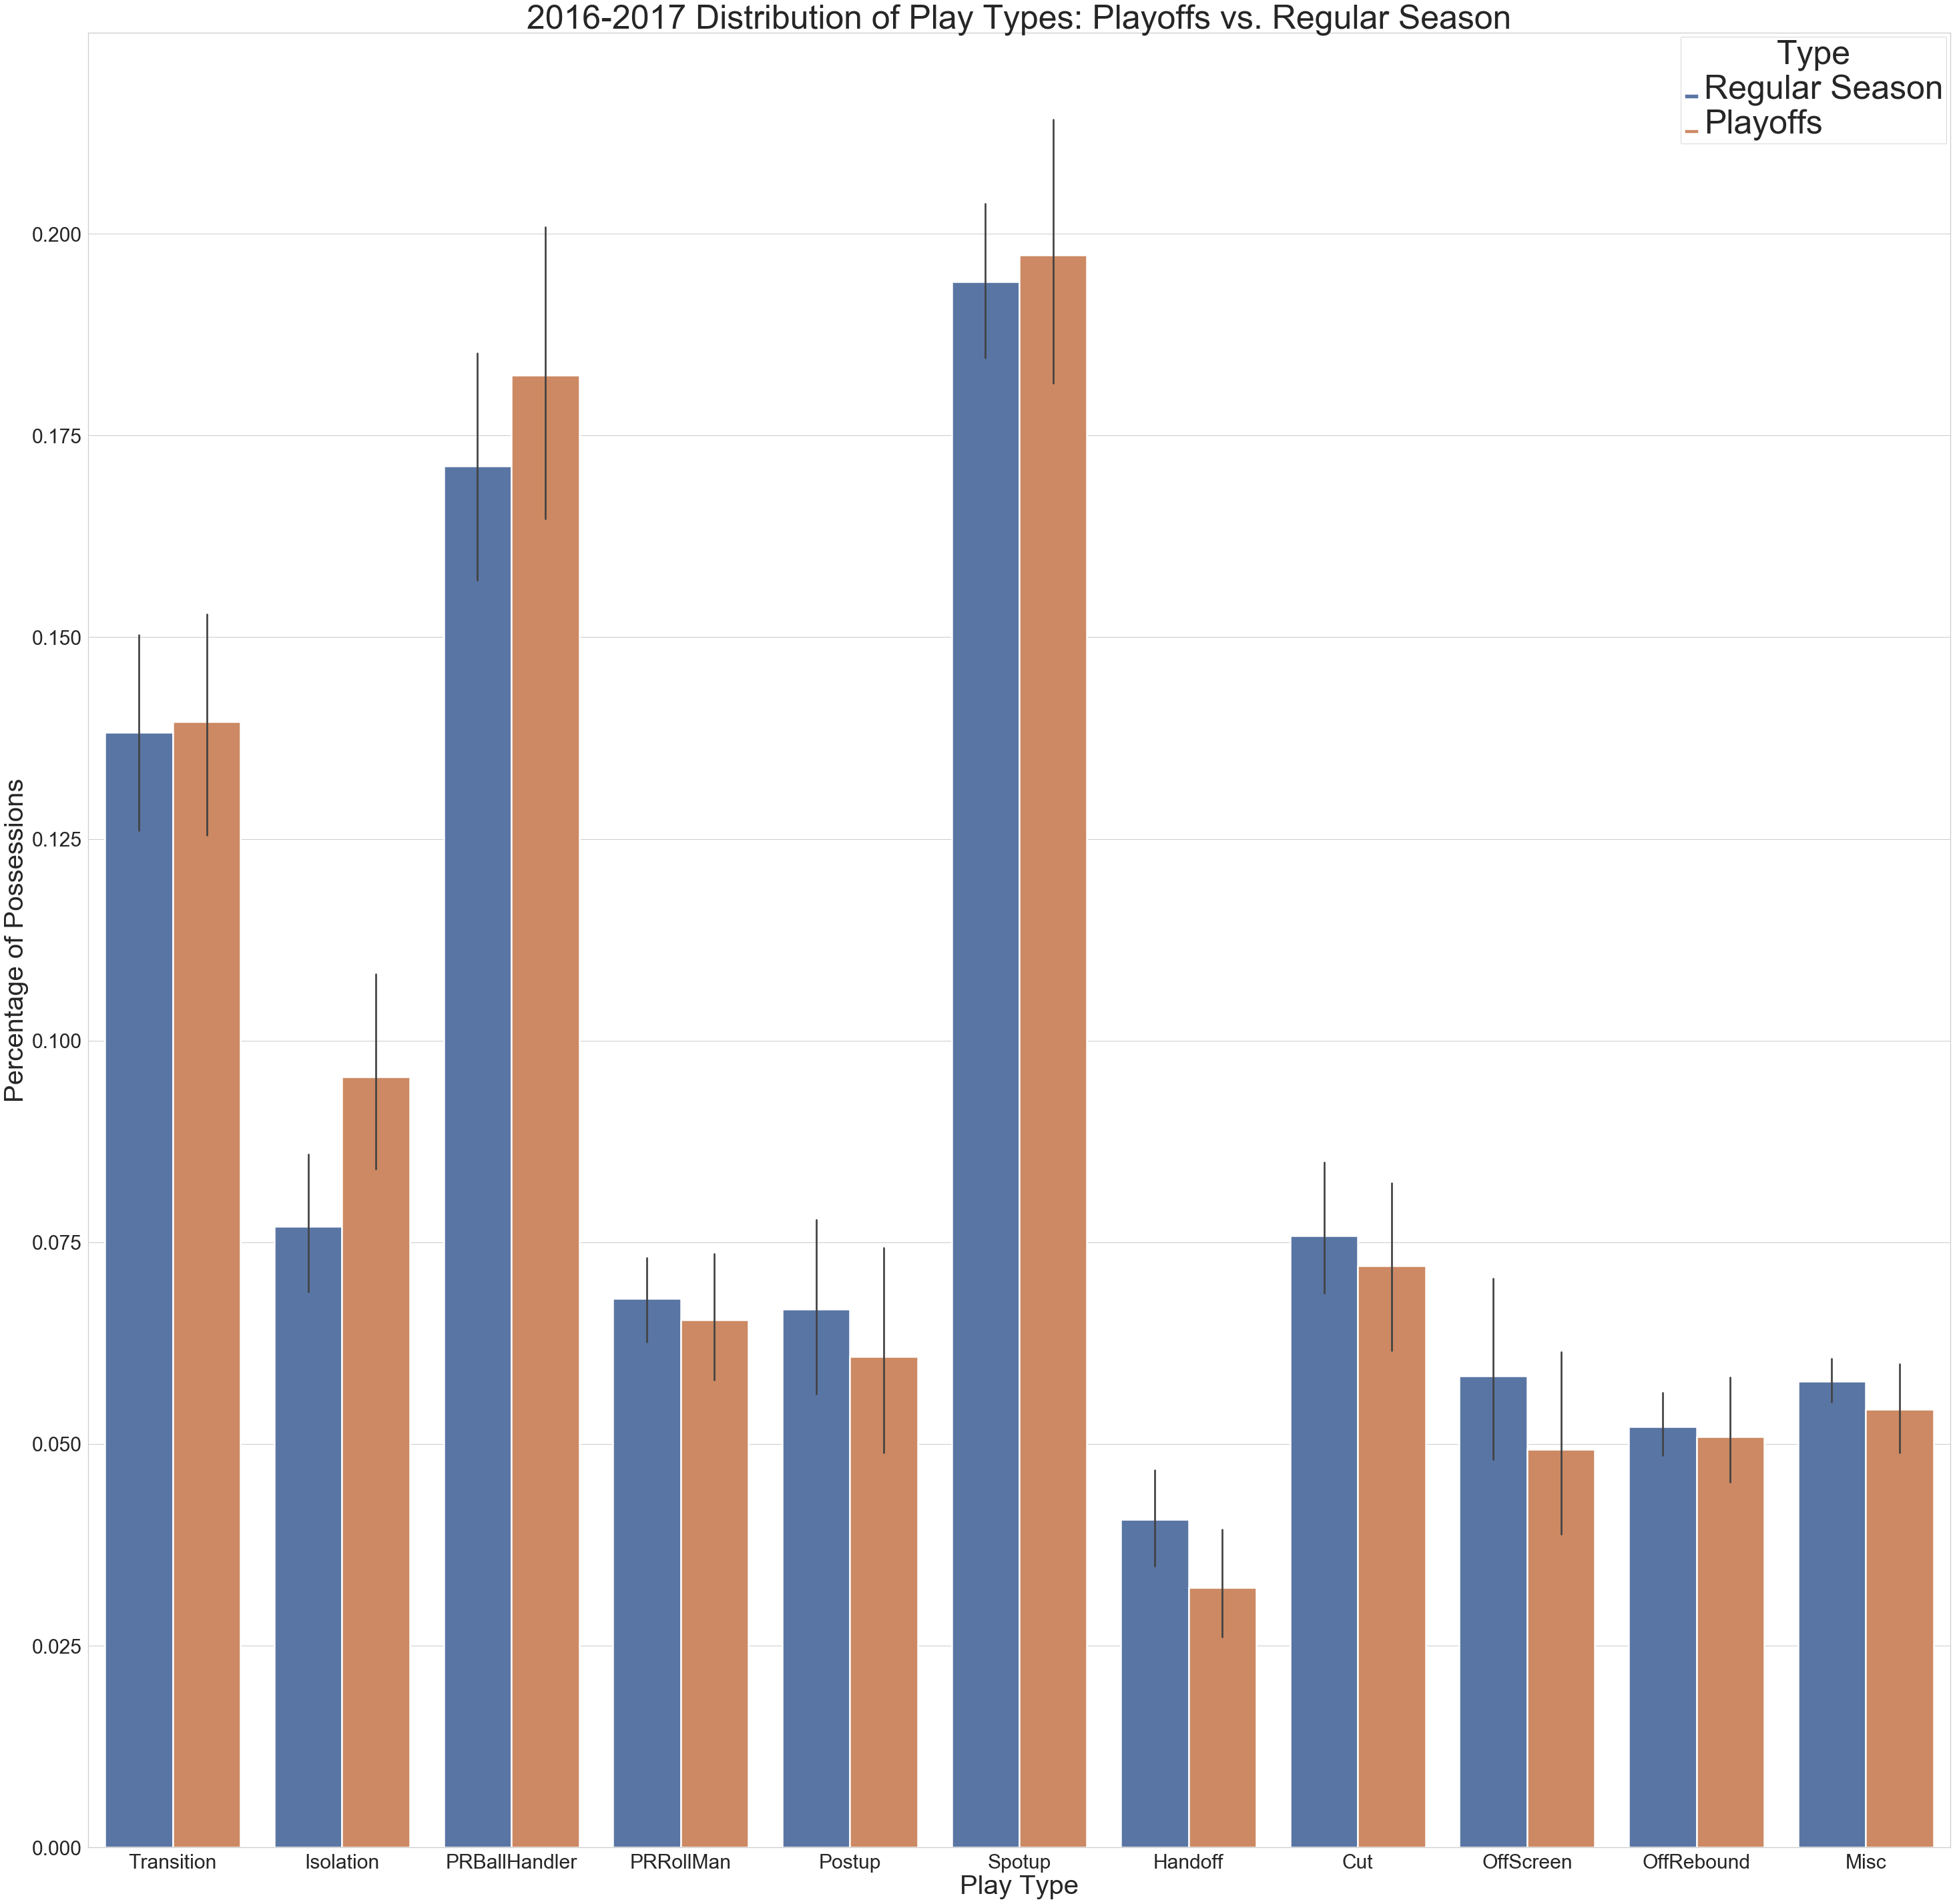

In [11]:
season = '2016-2017'
plot_team_differences(season=season)
plot_abs_team_differences(season=season)
plot_play_types(season=season)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


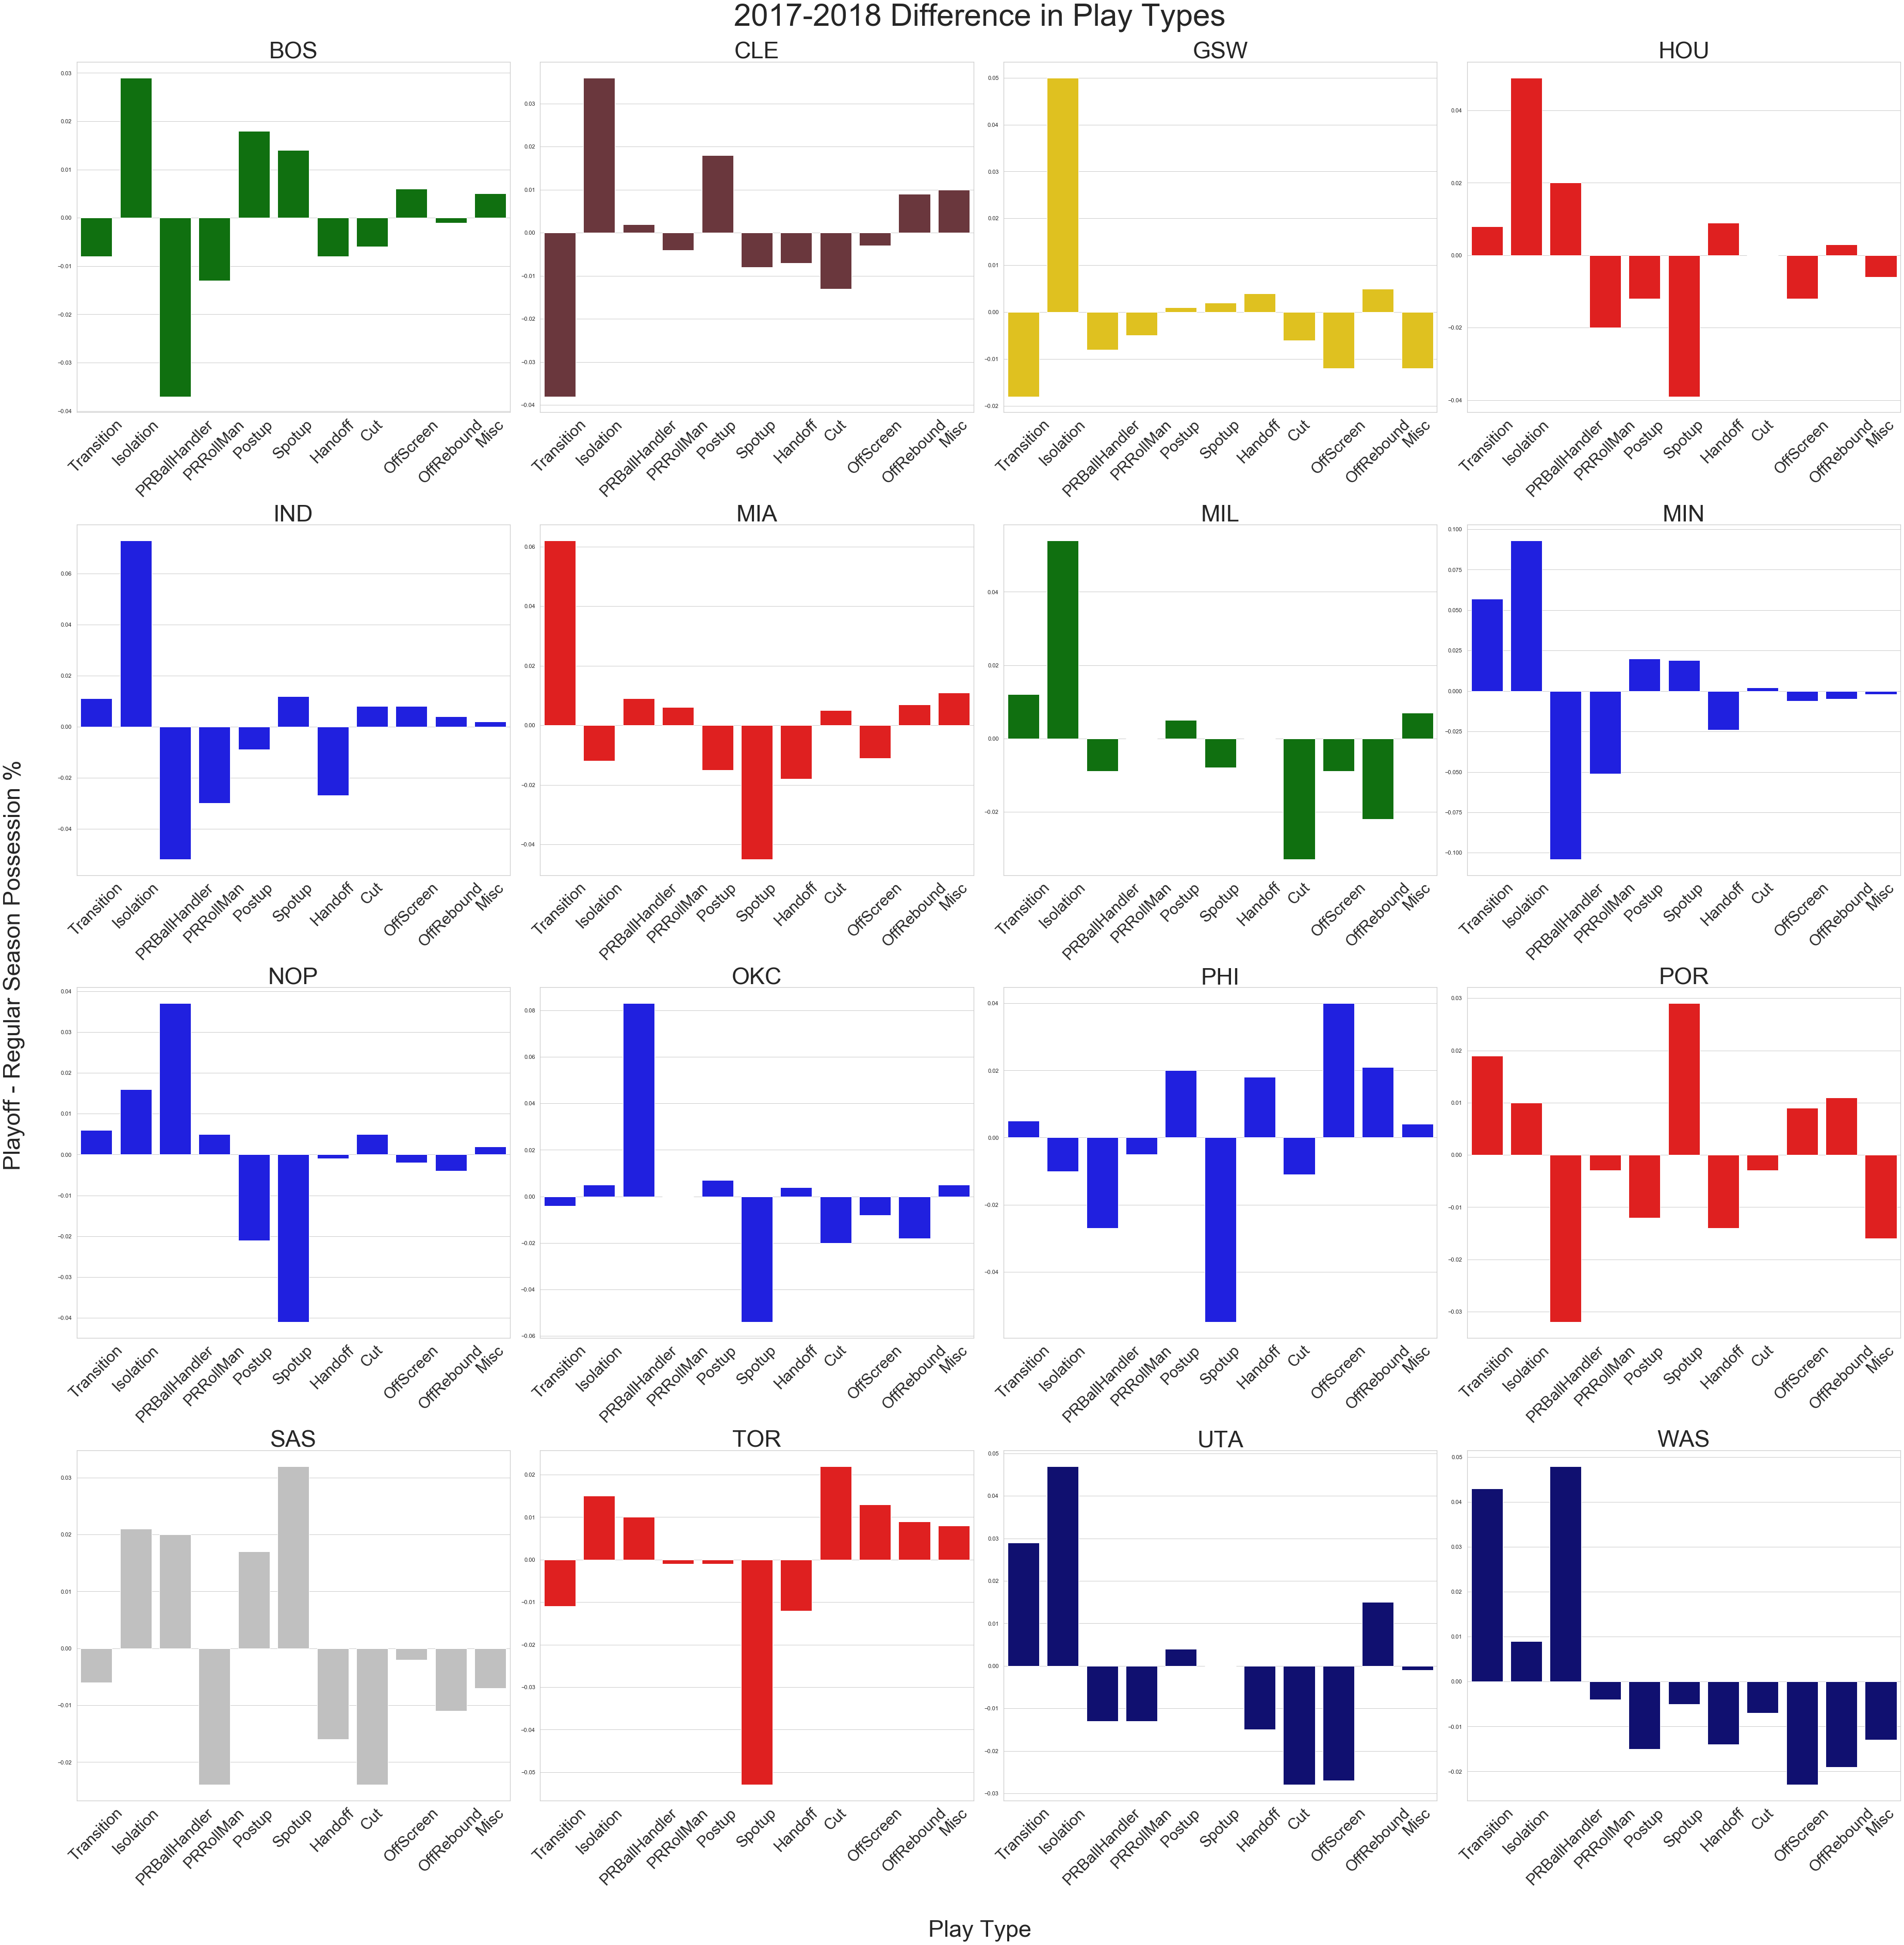

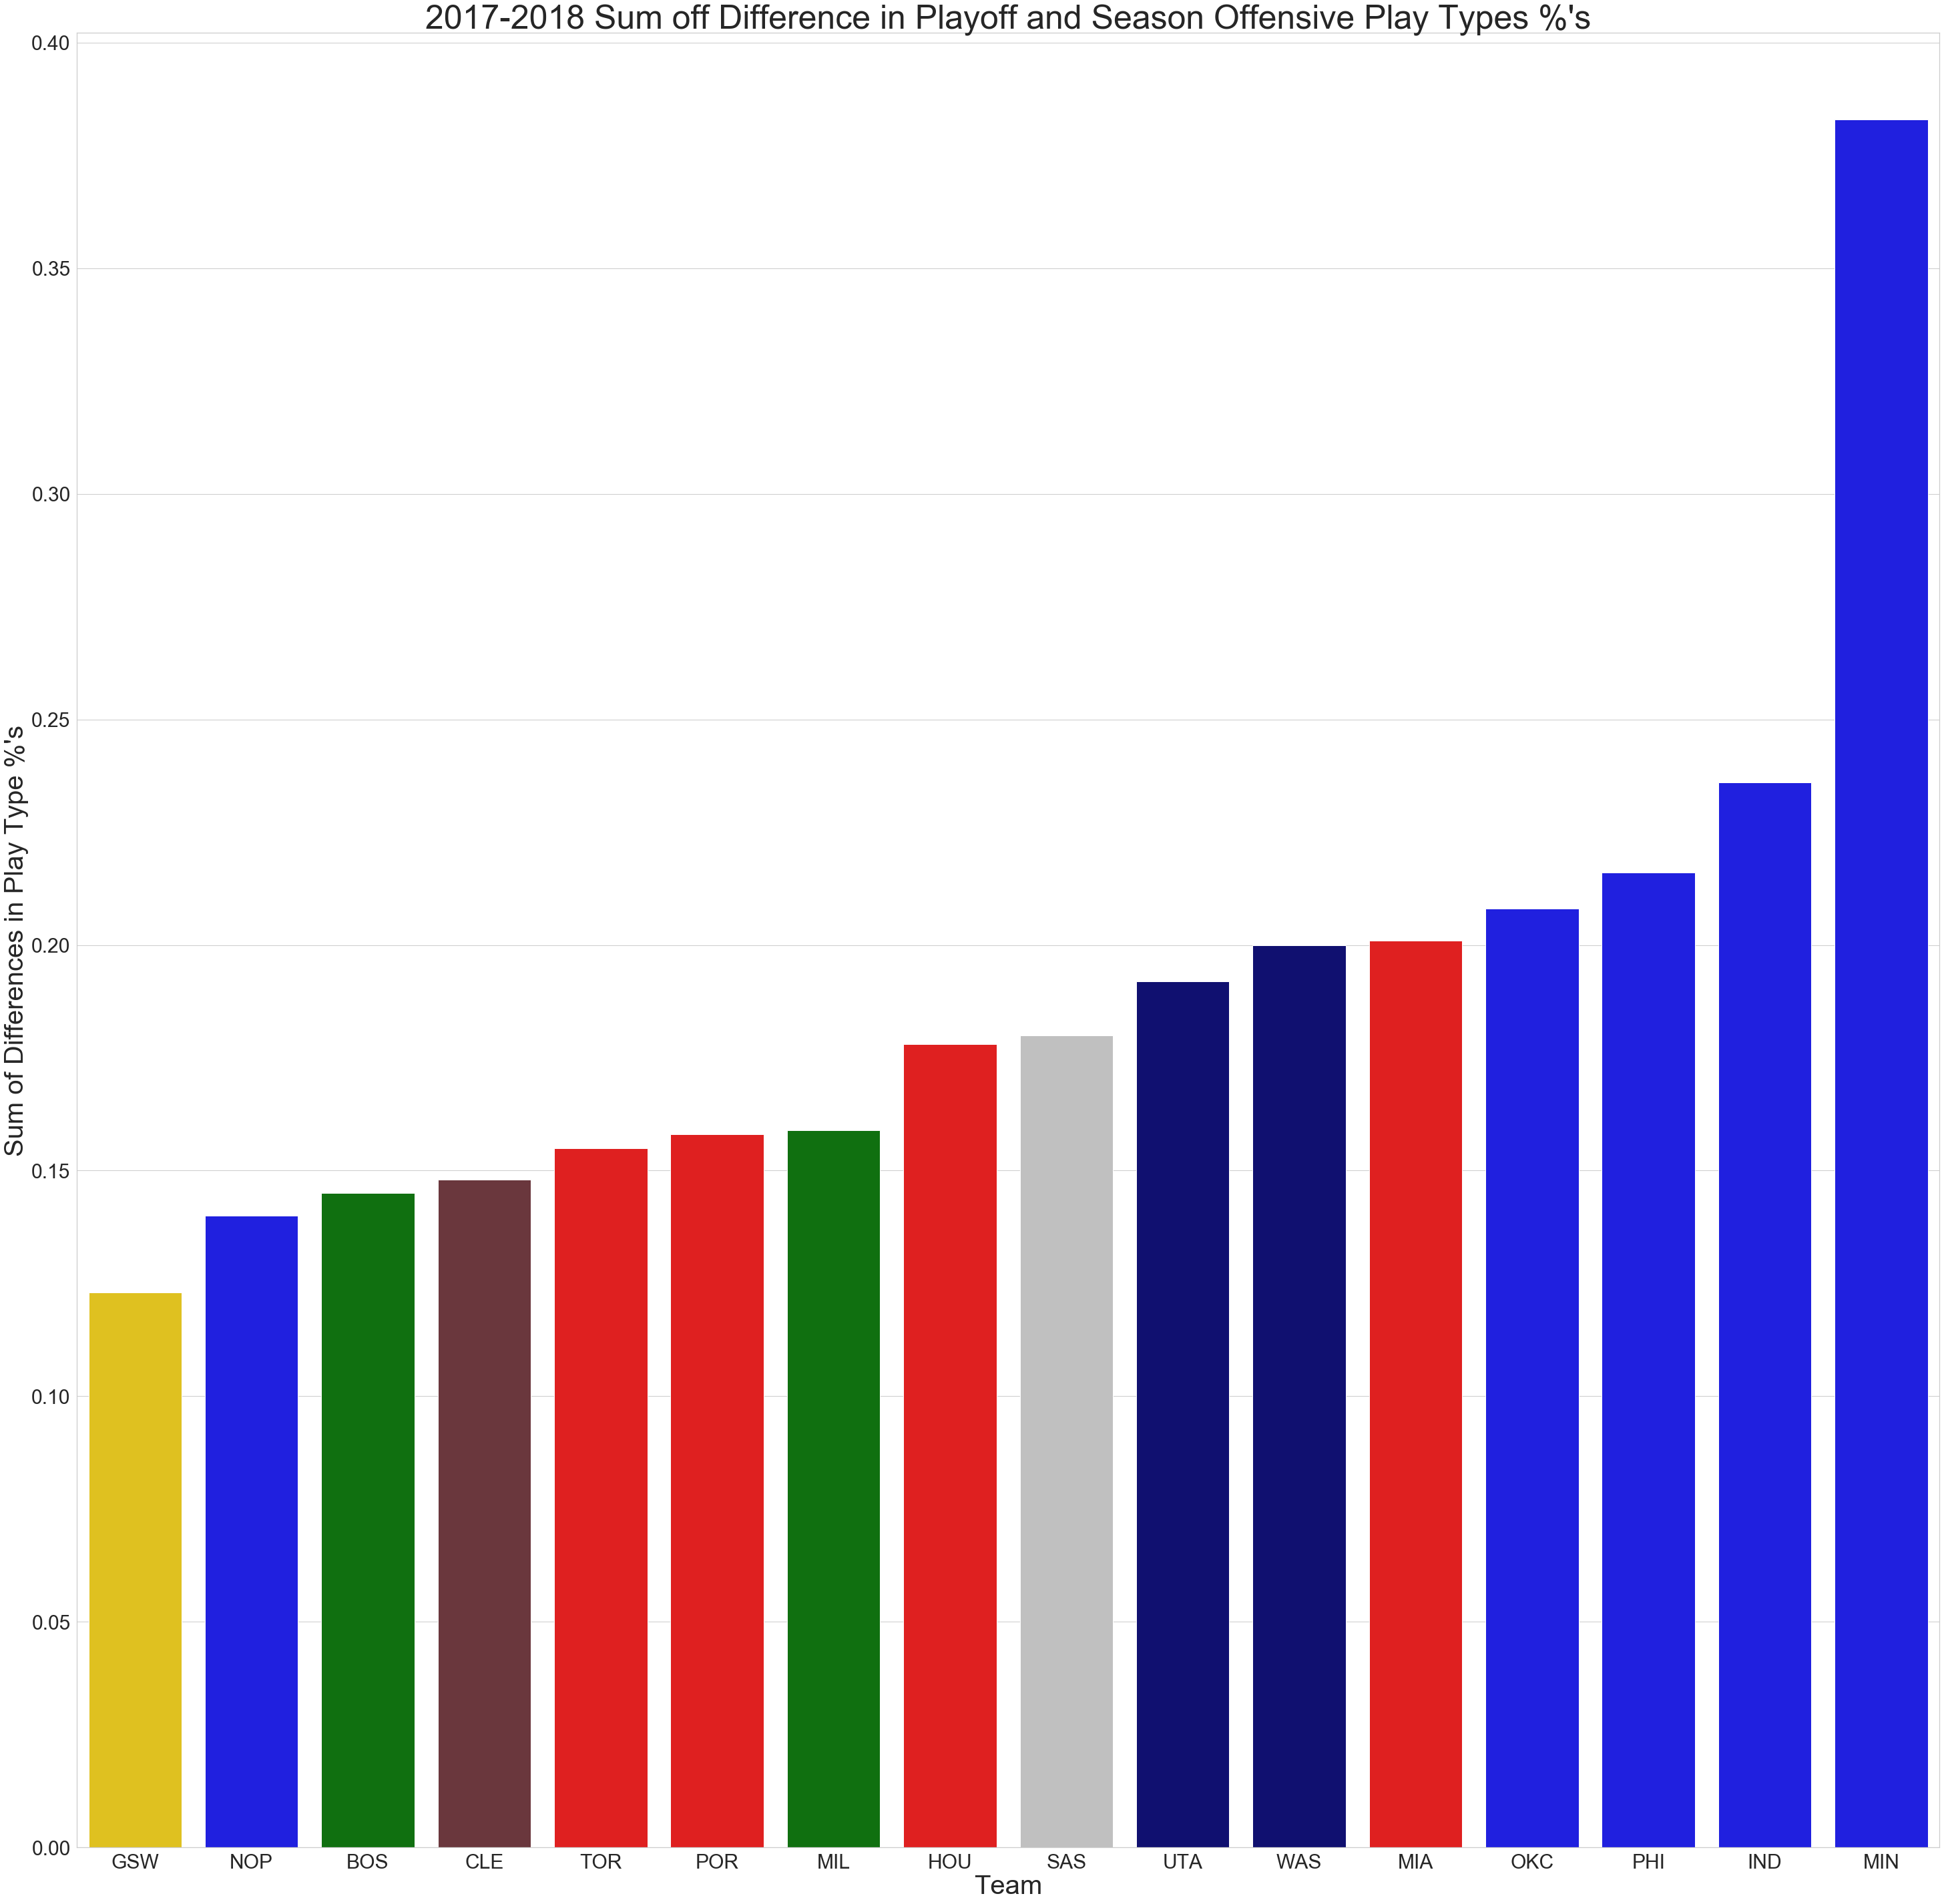

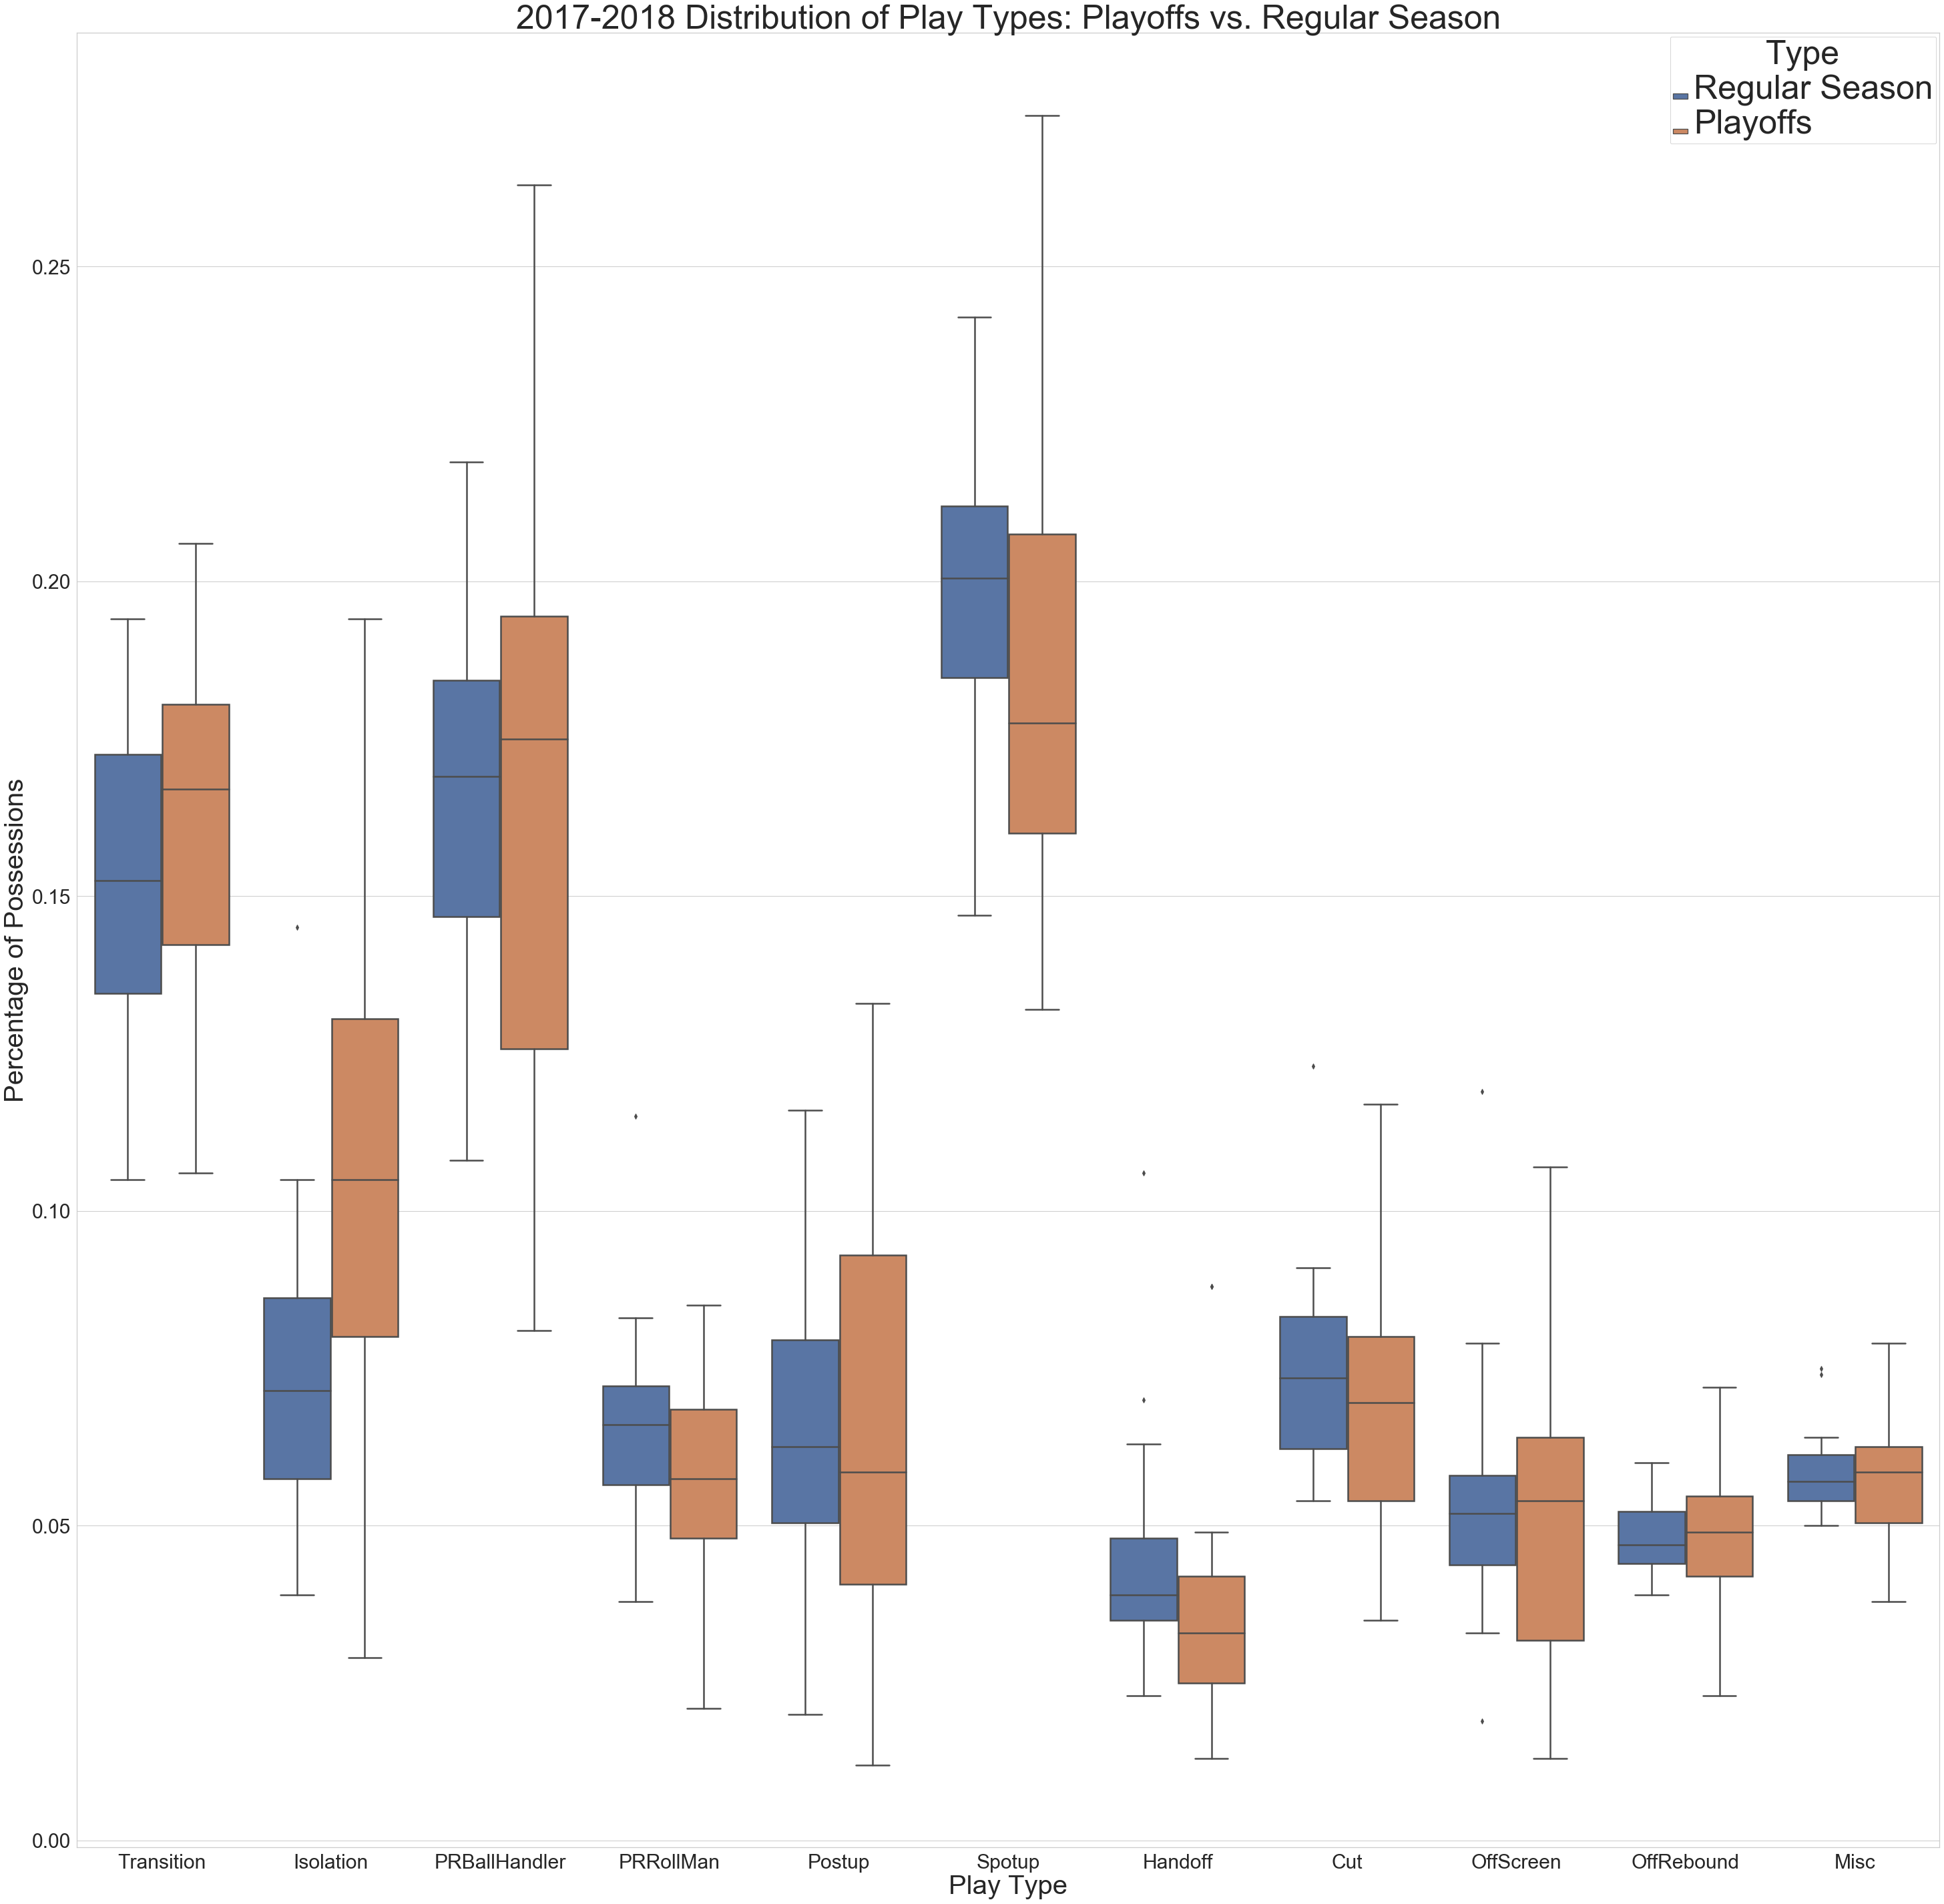

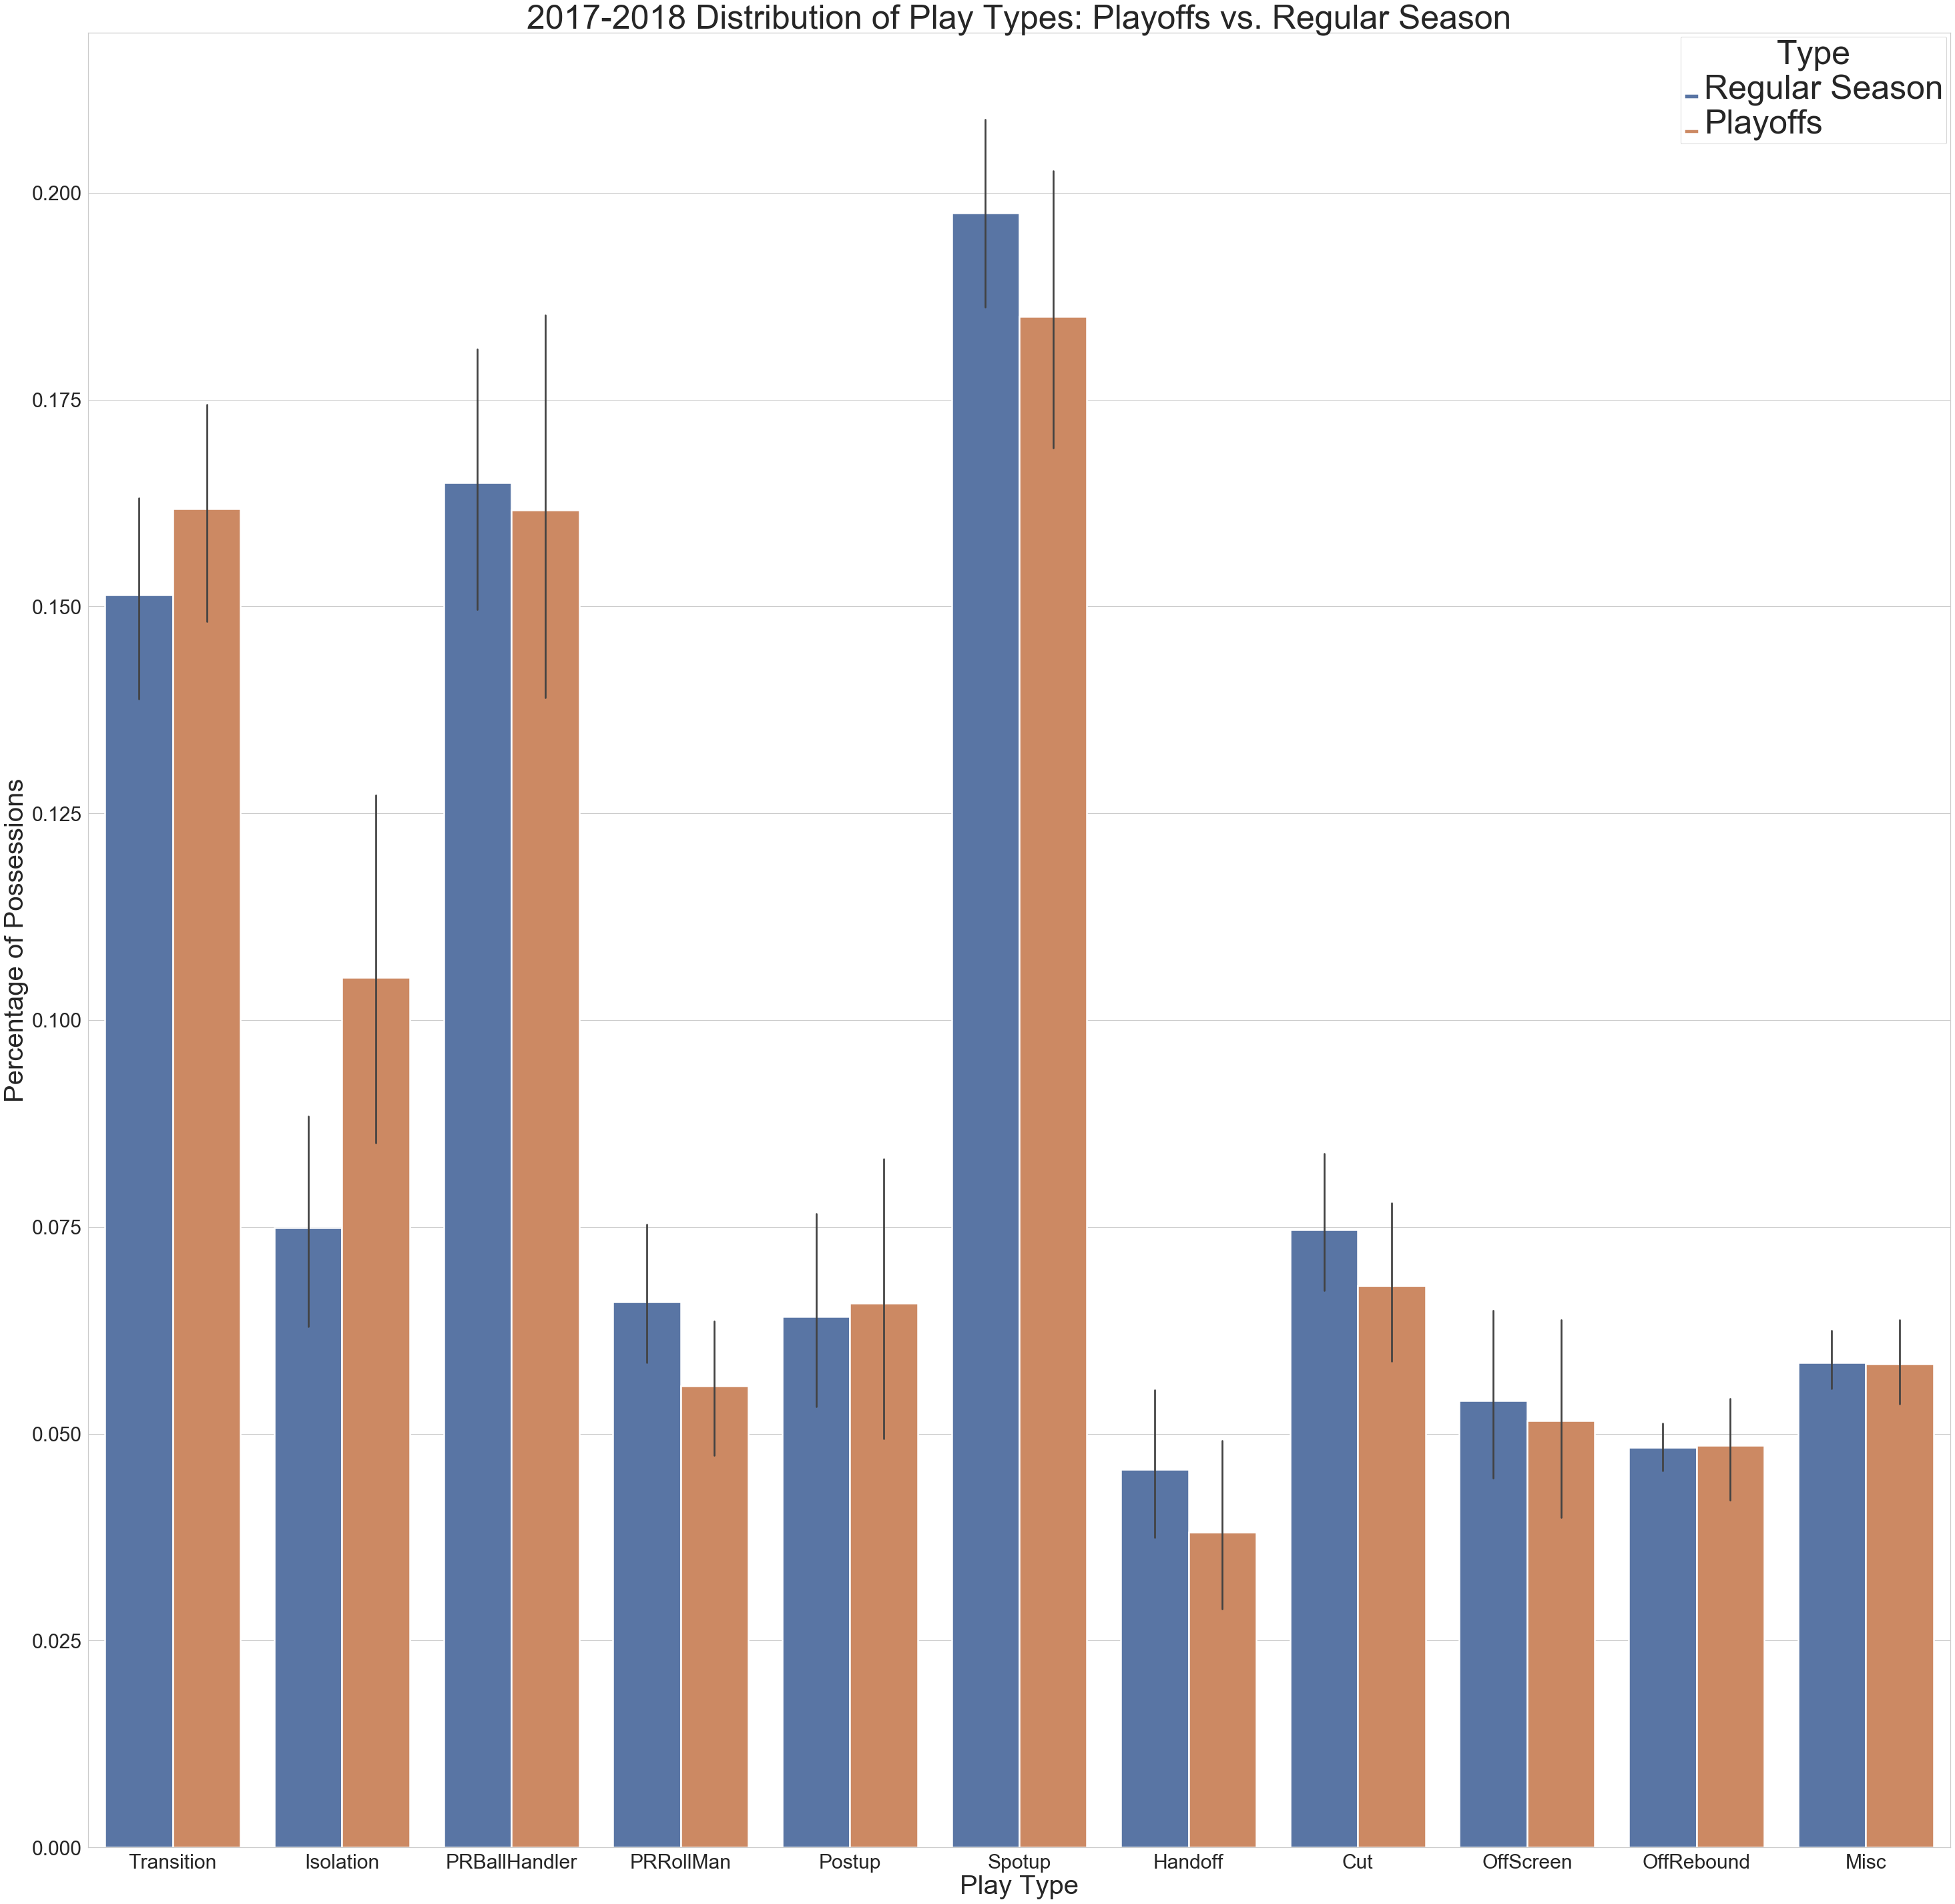

In [12]:
season = '2017-2018'
plot_team_differences(season=season)
plot_abs_team_differences(season=season)
plot_play_types(season=season)